In [7]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [8]:
df = pd.read_csv('../../data/data_with_target.csv')

In [9]:
df

Unnamed: 0  track_id  album_comments   album_date_created  \
0              0         2               0  2008-11-26 01:44:45   
1              1         5               0  2008-11-26 01:44:45   
2              2        10               0  2008-11-26 01:45:08   
3              3       140               1  2008-11-26 01:49:59   
4              4       141               0  2008-11-26 01:49:57   
...          ...       ...             ...                  ...   
7995        7995    154308               0  2017-03-05 04:57:38   
7996        7996    154309               0  2017-03-05 04:57:38   
7997        7997    154413               0  2017-03-07 18:44:11   
7998        7998    154414               0  2017-03-07 18:44:11   
7999        7999    155066               0  2017-03-24 19:40:34   

      album_favorites  album_id  album_listens  \
0                   4         1           6073   
1                   4         1           6073   
2                   4         6          47632   
3                   1        61           1300   
4                   1        60           1304   
...               ...       ...            ...   
7995                0     22780          22334   
7996                0     22780          22334   
7997                0     22789           3777   
7998                0     22789           3777   
7999                1     22899           4524   

                                            album_title  album_tracks  \
0                                  AWOL - A Way Of Life             7   
1                                  AWOL - A Way Of Life             7   
2                                     Constant Hitmaker             2   
3                                        The Blind Spot             1   
4                                 Every Man For Himself             2   
...                                                 ...           ...   
7995                                            Journey            18   
7996                                            Journey            18   
7997  Live at WFMU for Dark Night of the Soul wtih J...            11   
7998  Live at WFMU for Dark Night of the Soul wtih J...            11   
7999                                            Horizon             4   

            album_type  ...  soundcloud_website track_title_char_count  \
0                Album  ...               False                      4   
1                Album  ...               False                     10   
2                Album  ...               False                      7   
3                Album  ...               False                     18   
4                Album  ...               False                      4   
...                ...  ...                 ...                    ...   
7995             Album  ...                True                      3   
7996             Album  ...                True                     11   
7997  Live Performance  ...               False                      7   
7998  Live Performance  ...               False                     27   
7999             Album  ...               False                      3   

      album_information_bin  artist_bio_bin months_life listens_month  \
0                         1               1         101     12.801980   
1                         1               1         101     11.396040   
2                         0               1         101    496.386139   
3                         1               1         101     12.861386   
4                         1               1         101      7.178218   
...                     ...             ...         ...           ...   
7995                      0               1           1   2705.000000   
7996                      0               1           1   3589.000000   
7997                      1               1           1    676.000000   
7998                      1               1           1    788.000000   
7999                      1    

## EDA on audio features

### MFCC mean

In [10]:
# extracting subset of columns, here mfcc_mean columns
m = df.columns.str.contains('mfcc_mean')
mfcc_mean = df[df.columns[m]]

In [11]:
mfcc_mean['mfcc_mean_01'].describe()

count    8000.000000
mean     -202.465155
std        93.828144
min      -985.113586
25%      -258.312813
50%      -191.349411
75%      -136.625225
max       138.371613
Name: mfcc_mean_01, dtype: float64

<Axes: xlabel='mfcc_mean_01', ylabel='Density'>

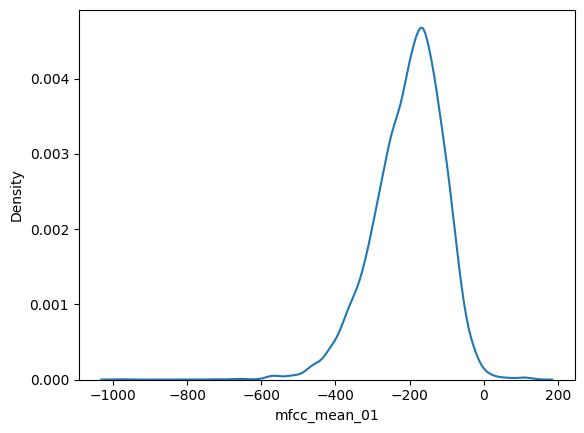

In [12]:
# looking at distribution of feature
sns.kdeplot(mfcc_mean['mfcc_mean_01'])

<Axes: ylabel='Density'>

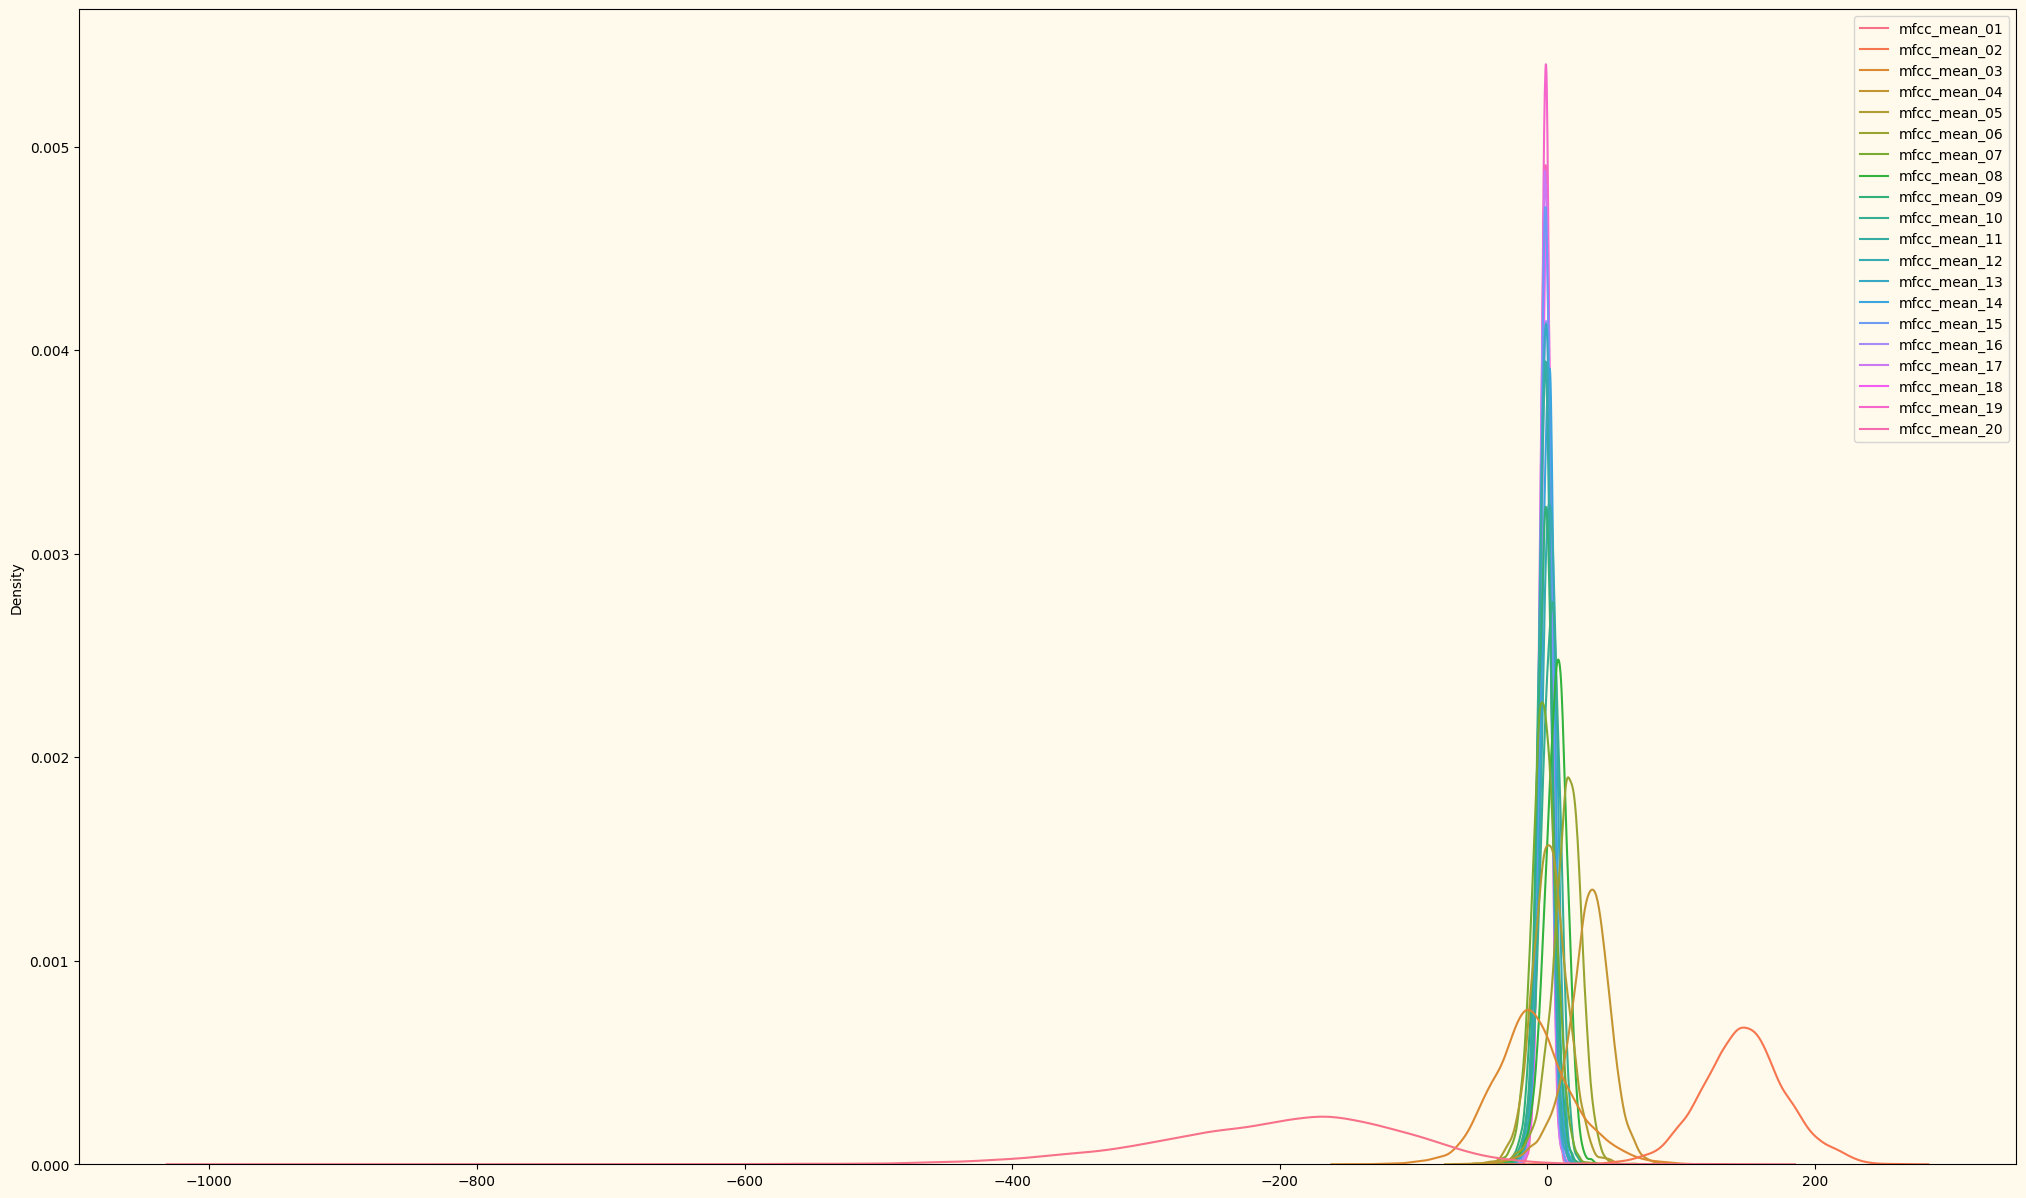

In [178]:
# plotting all mfcc_mean's from 1-20
plt.figure(figsize=(25,15))
sns.kdeplot(data=mfcc_mean)

If a cepstral coefficient has a positive value, the majority of the spectral energy is concentrated in the low-frequency regions. On the other hand, if a cepstral coefficient has a negative value, it represents that most of the spectral energy is concentrated at high frequencies.

### MFCC mean against target 'track_listens'

In [5]:
listens_bins = df['listens_bins']

In [14]:
mfcc_mean_listens_bins = mfcc_mean.join(listens_bins, how='left')

mfcc_mean_listens_bins

mfcc_mean_01  mfcc_mean_02  mfcc_mean_03  mfcc_mean_04  mfcc_mean_05  \
0      -163.772964    116.696678    -41.753826     29.144329    -15.050158   
1      -205.440491    132.215073    -16.085823     41.514759     -7.642954   
2      -135.864822    157.040085    -53.453247     17.198896      6.868035   
3      -225.713318    139.332825    -13.097699     44.533356      2.468400   
4      -253.143906    155.716324    -16.636627     23.683815      6.045957   
...            ...           ...           ...           ...           ...   
7995   -288.879303    152.342087     -2.517532      8.582313     -0.384105   
7996   -367.696625    104.314285     11.179615     -9.774891    -12.614079   
7997   -229.868378    155.606247      4.354007     45.476540     -7.373891   
7998   -225.491821    156.149582     -4.608137     42.489342     -8.574591   
7999   -291.700775    160.115982     93.731789     49.252903     -0.456035   

      mfcc_mean_06  mfcc_mean_07  mfcc_mean_08  mfcc_mean_09  mfcc_mean_10  \
0        18.879372     -8.918165     12.002118     -4.253151      1.359791   
1        16.942802     -5.651261      9.569445      0.503157      8.673513   
2        13.934344    -11.749298      8.360711     -5.130381      0.233845   
3        28.328743     -9.931481     10.810857      3.002879     -0.937692   
4        11.692952     -9.947761      6.887814     -3.273322     -6.340906   
...            ...           ...           ...           ...           ...   
7995      4.368904      3.391255      5.985993      9.245567      4.665963   
7996      1.173940    -10.825560    -10.481558    -12.770616     -8.729056   
7997     22.758905      2.523344      9.925150      7.117429      1.199985   
7998     10.030898     -9.780822     -1.589058      3.073855      3.905075   
7999     -8.281082    -12.962958     -2.272800      1.398377     -0.398876   

      ...  mfcc_mean_12  mfcc_mean_13  mfcc_mean_14  mfcc_mean_15  \
0     ...     -0.794632     -6.920971     -3.655366      1.465213   
1     ...      0.594473     -0.340203      2.377888      7.899487   
2     ...      1.679479     -6.218249      1.844195     -4.099704   
3     ...     -6.625260      0.824269     -2.003132      4.293943   
4     ...     -5.851329      2.017422     -4.396296     -3.689521   
...   ...           ...           ...           ...           ...   
7995  ...      0.592779      2.949878      5.256505      1.607061   
7996  ...     -6.167614     -5.817488      0.828269     -1.539551   
7997  ...      4.540169      4.224662      1.915167     -1.782451   
7998  ...      6.542689     -0.049502     -2.948072     -3.487443   
7999  ...     -5.039856     -4.664367     -2.756296     -0.987940   

      mfcc_mean_16  mfcc_mean_17  mfcc_mean_18  mfcc_mean_19  mfcc_mean_20  \
0         0.201078      3.998204     -2.114676      0.116842     -5.785884   
1         1.947641      7.441950     -1.739911      0.278015     -5.489016   
2         0.779950     -0.559577     -1.018324     -3.807545     -0.679533   
3        -7.935050      0.063948     -2.363509     -0.158602      0.594098   
4        -0.929987      0.783247      0.768126      2.809321      3.325740   
...            ...           ...           ...           ...           ...   
7995      2.205407     -1.347569      2.550121      5.137365      6.354999   
7996     -2.340352     -6.185808     -5.277195     -9.561085     -8.861394   
7997      4.374582      6.465470      1.281081      4.305267      0.595658   
7998     -0.383391     -2.238332     -4.390033     -2.679048     -5.389973   
7999      0.257712      1.739598      2.405217      2.127824      3.123198   

      listens_bins  
0                2  
1                1  
2                4  
3                2  
4                1  
...            ...  
7995             4  
7996             4  
7997             2  
7998             2  
7999             3  

[8000 rows x 21 columns]

Heatmap

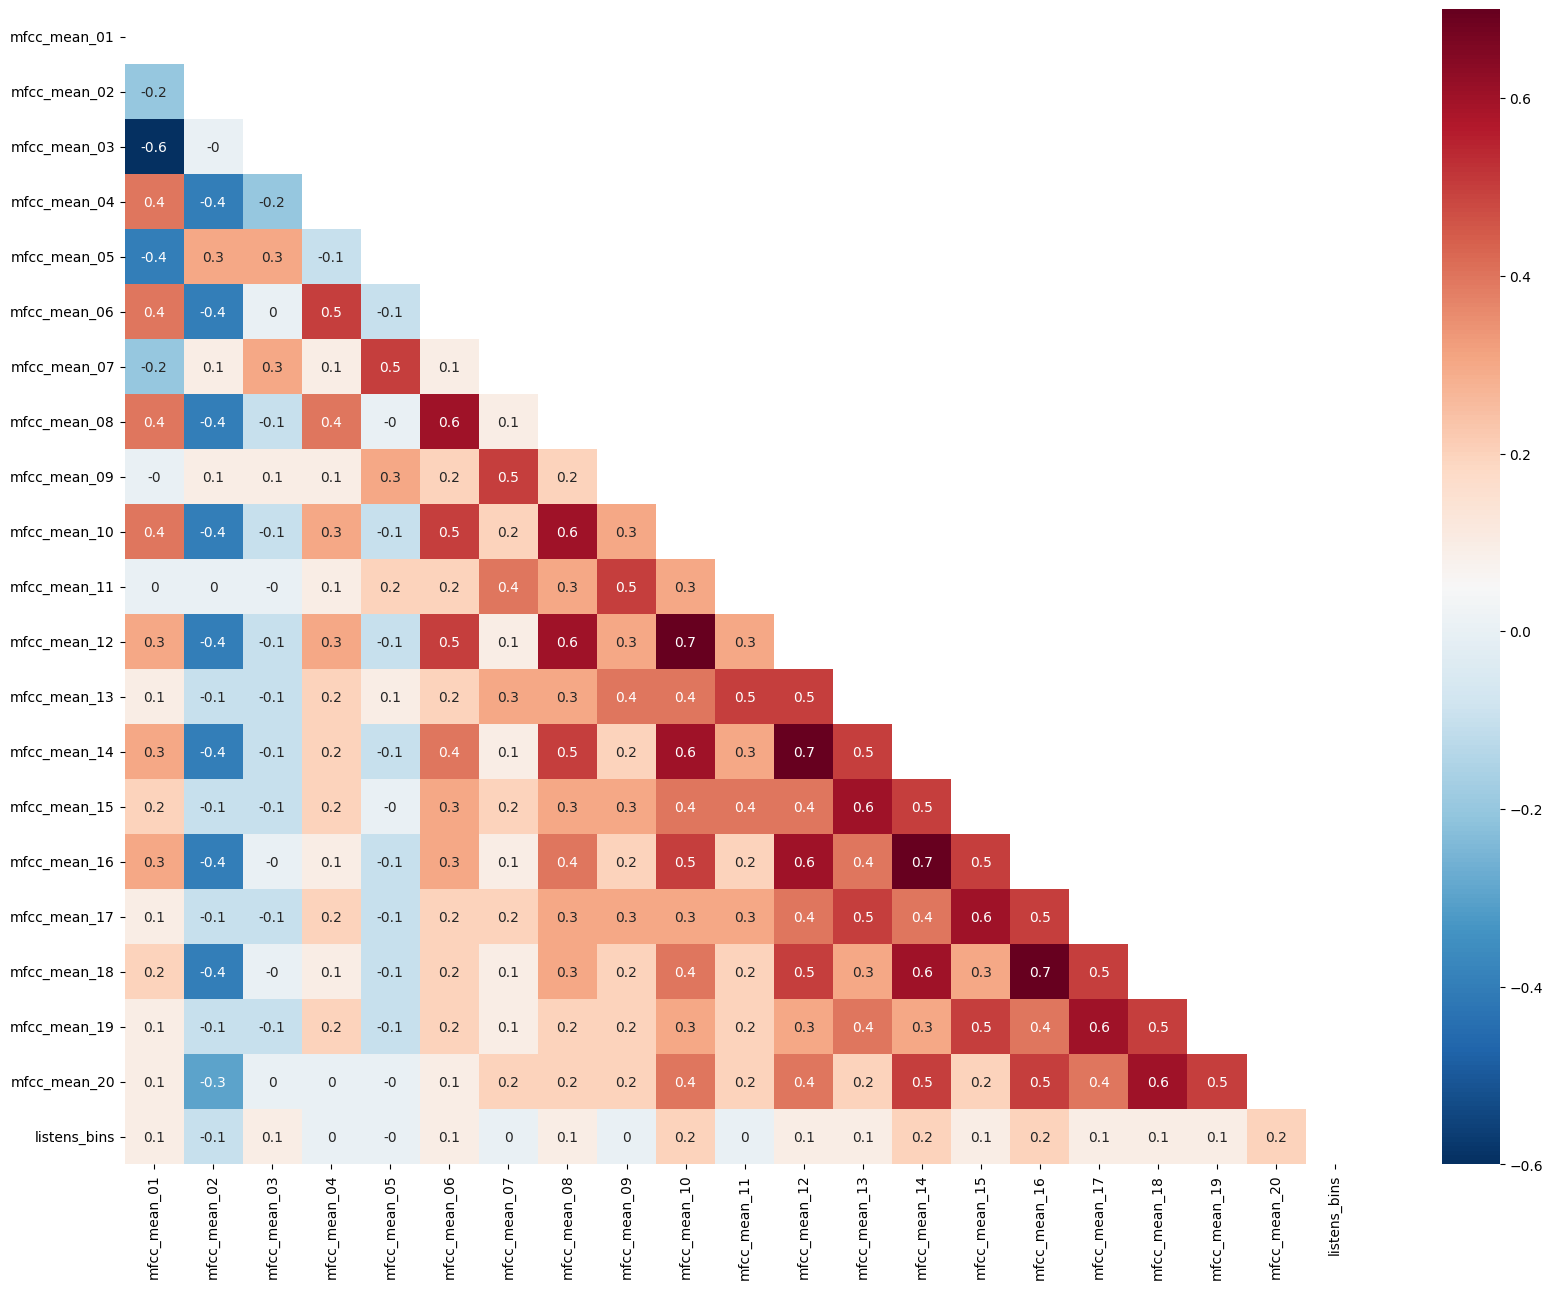

In [17]:
# Plotting correlation matrix 
mask = np.triu(df_test.corr())
plt.figure(figsize = (20,15))
ax = sns.heatmap(round(mfcc_mean_listens_bins.corr(), 1)
                 ,annot=True
                 ,mask=mask
                 ,cmap='RdBu_r')

No correlation between our listens_bins classes and mfcc_mean. Correlation in last mel bands, covered in PCA.

### MFCC mean against column 'track_comments'

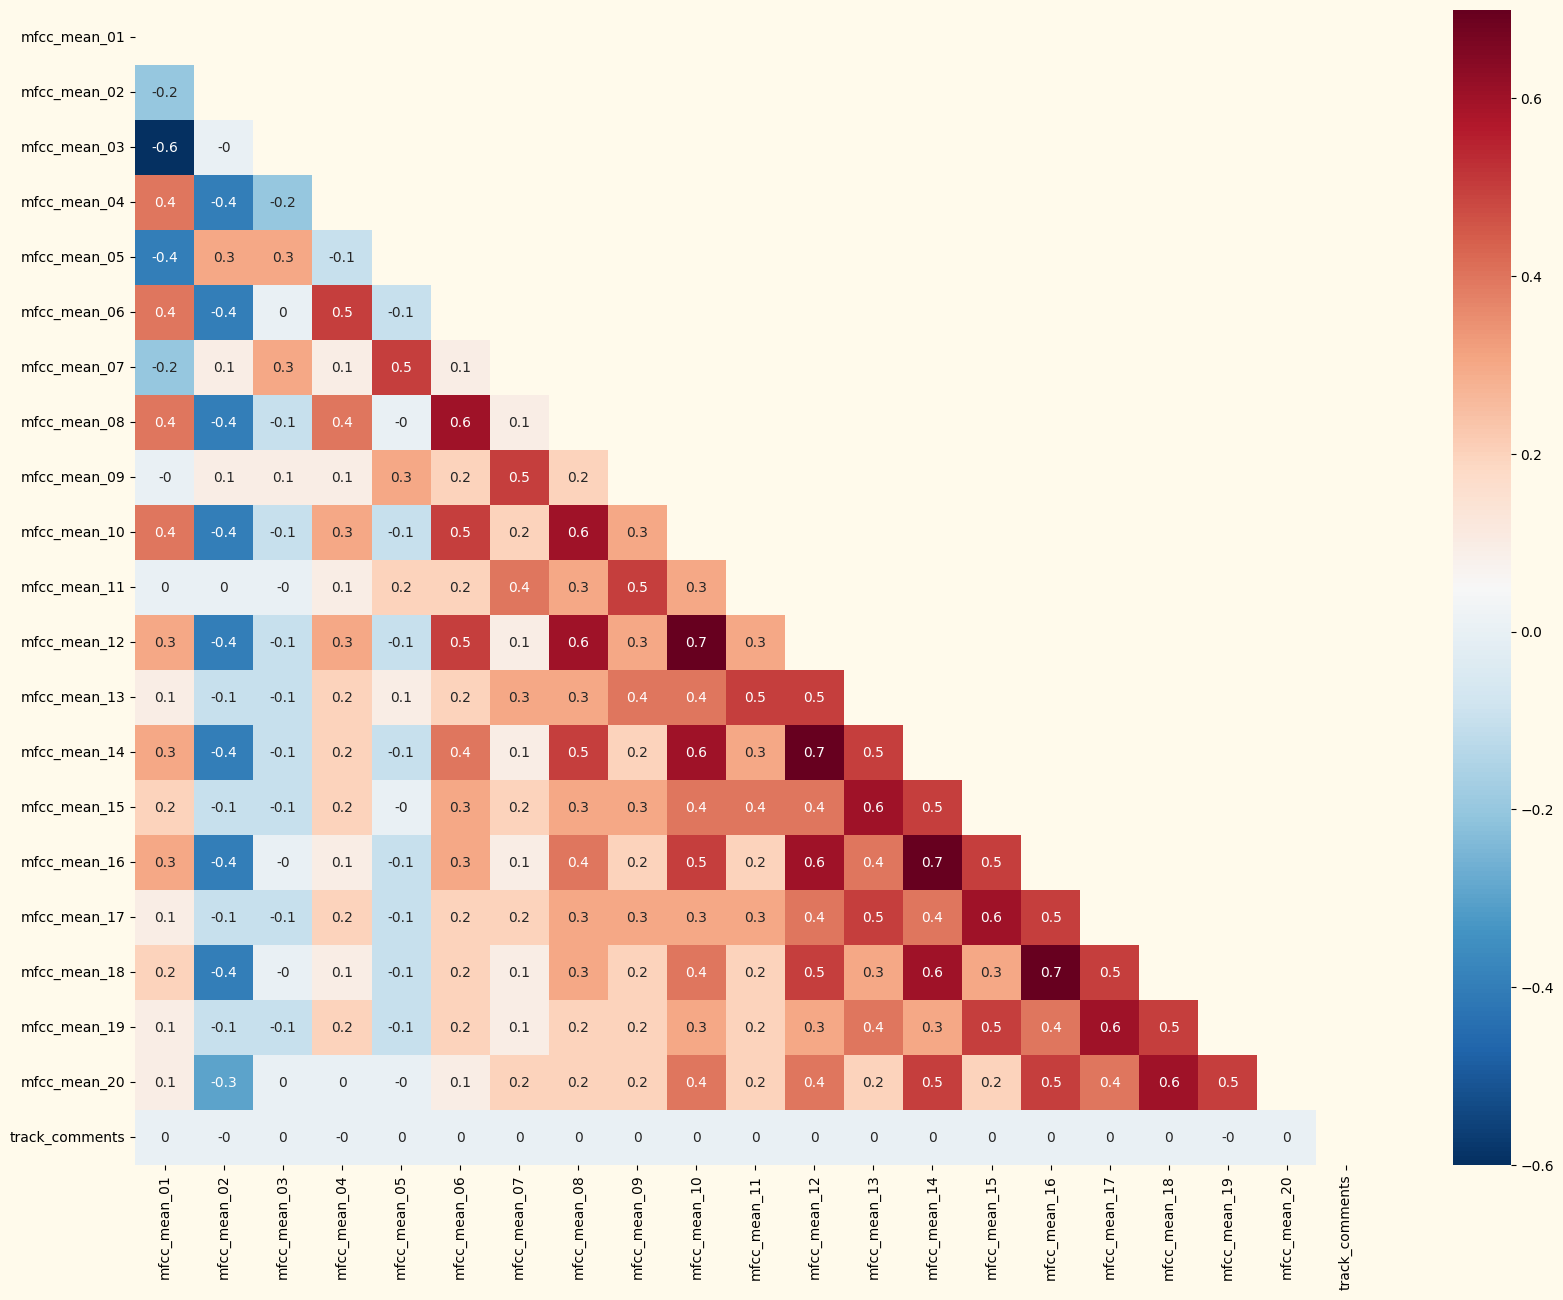

In [184]:
track_comments = df['track_comments']

df_test2 = mfcc_mean.join(track_comments, how='left')

# Plot correlation matrix 
mask = np.triu(df_test2.corr())
plt.figure(figsize = (20,15))
ax = sns.heatmap(round(df_test2.corr(), 1)
                 ,annot=True
                 ,mask=mask
                 ,cmap='RdBu_r')

### MFCC mean against column 'track_favorites'

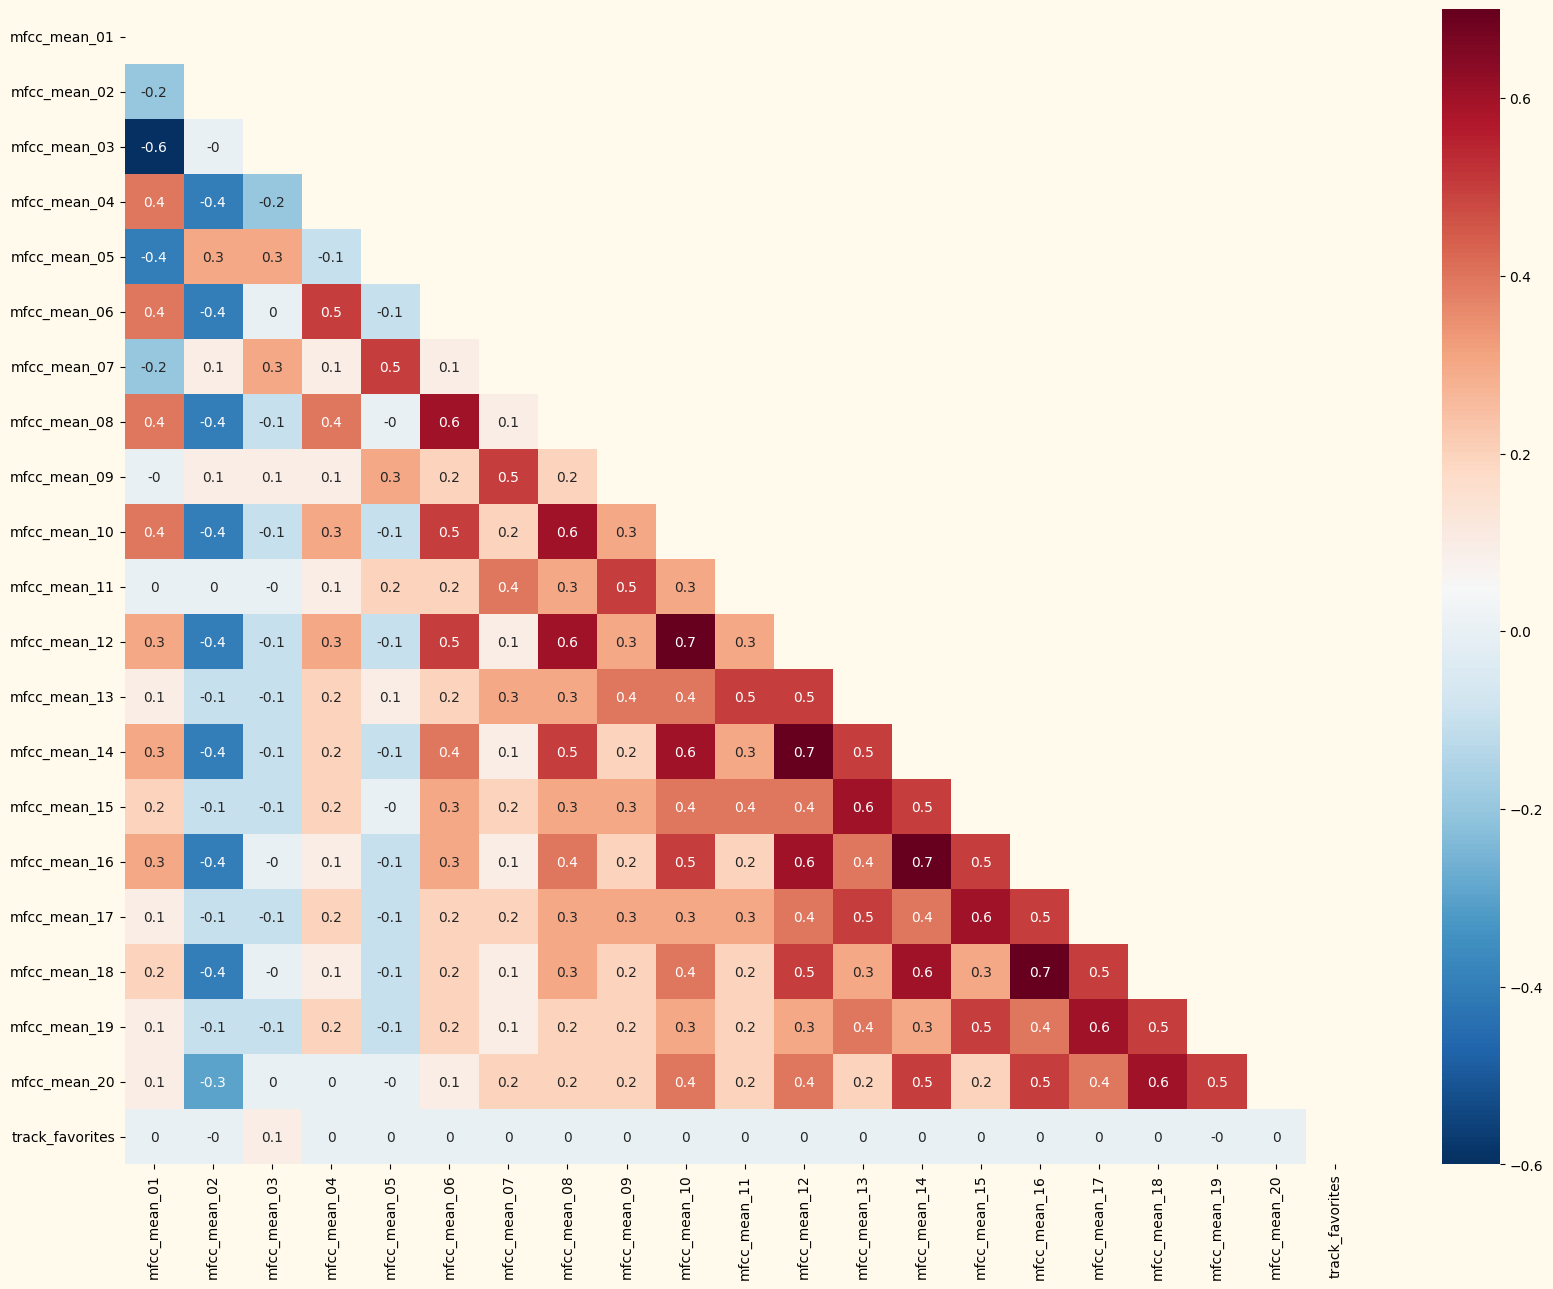

In [185]:
track_fav = df['track_favorites']

df_test3 = mfcc_mean.join(track_fav, how='left')

# Plot correlation matrix 
mask = np.triu(df_test3.corr())
plt.figure(figsize = (20,15))
ax = sns.heatmap(round(df_test3.corr(), 1)
                 ,annot=True
                 ,mask=mask
                 ,cmap='RdBu_r')

### MFCC mean against column 'track_interest'

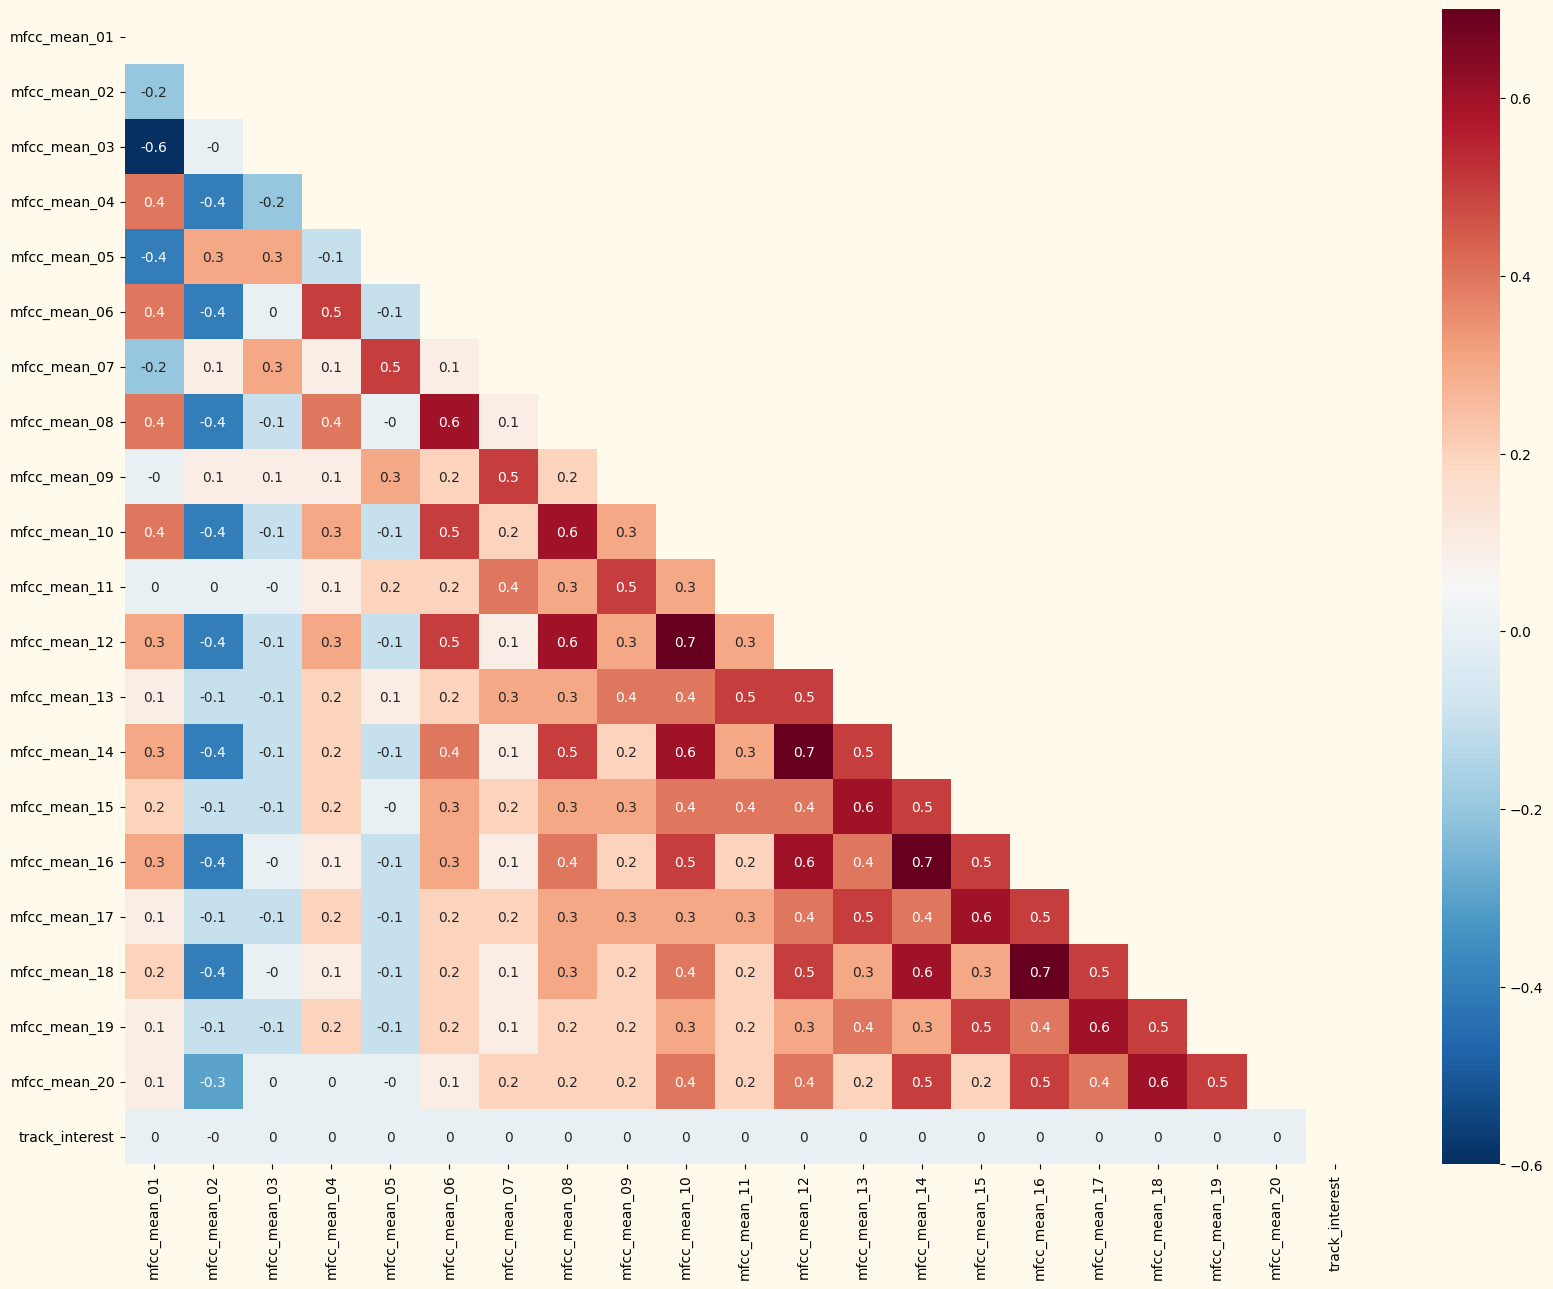

In [186]:
track_interest = df['track_interest']

df_test4 = mfcc_mean.join(track_interest, how='left')

# Plot correlation matrix 
mask = np.triu(df_test4.corr())
plt.figure(figsize = (20,15))
ax = sns.heatmap(round(df_test4.corr(), 1)
                 ,annot=True
                 ,mask=mask
                 ,cmap='RdBu_r')

### MFCC mean against column 'track_duration'

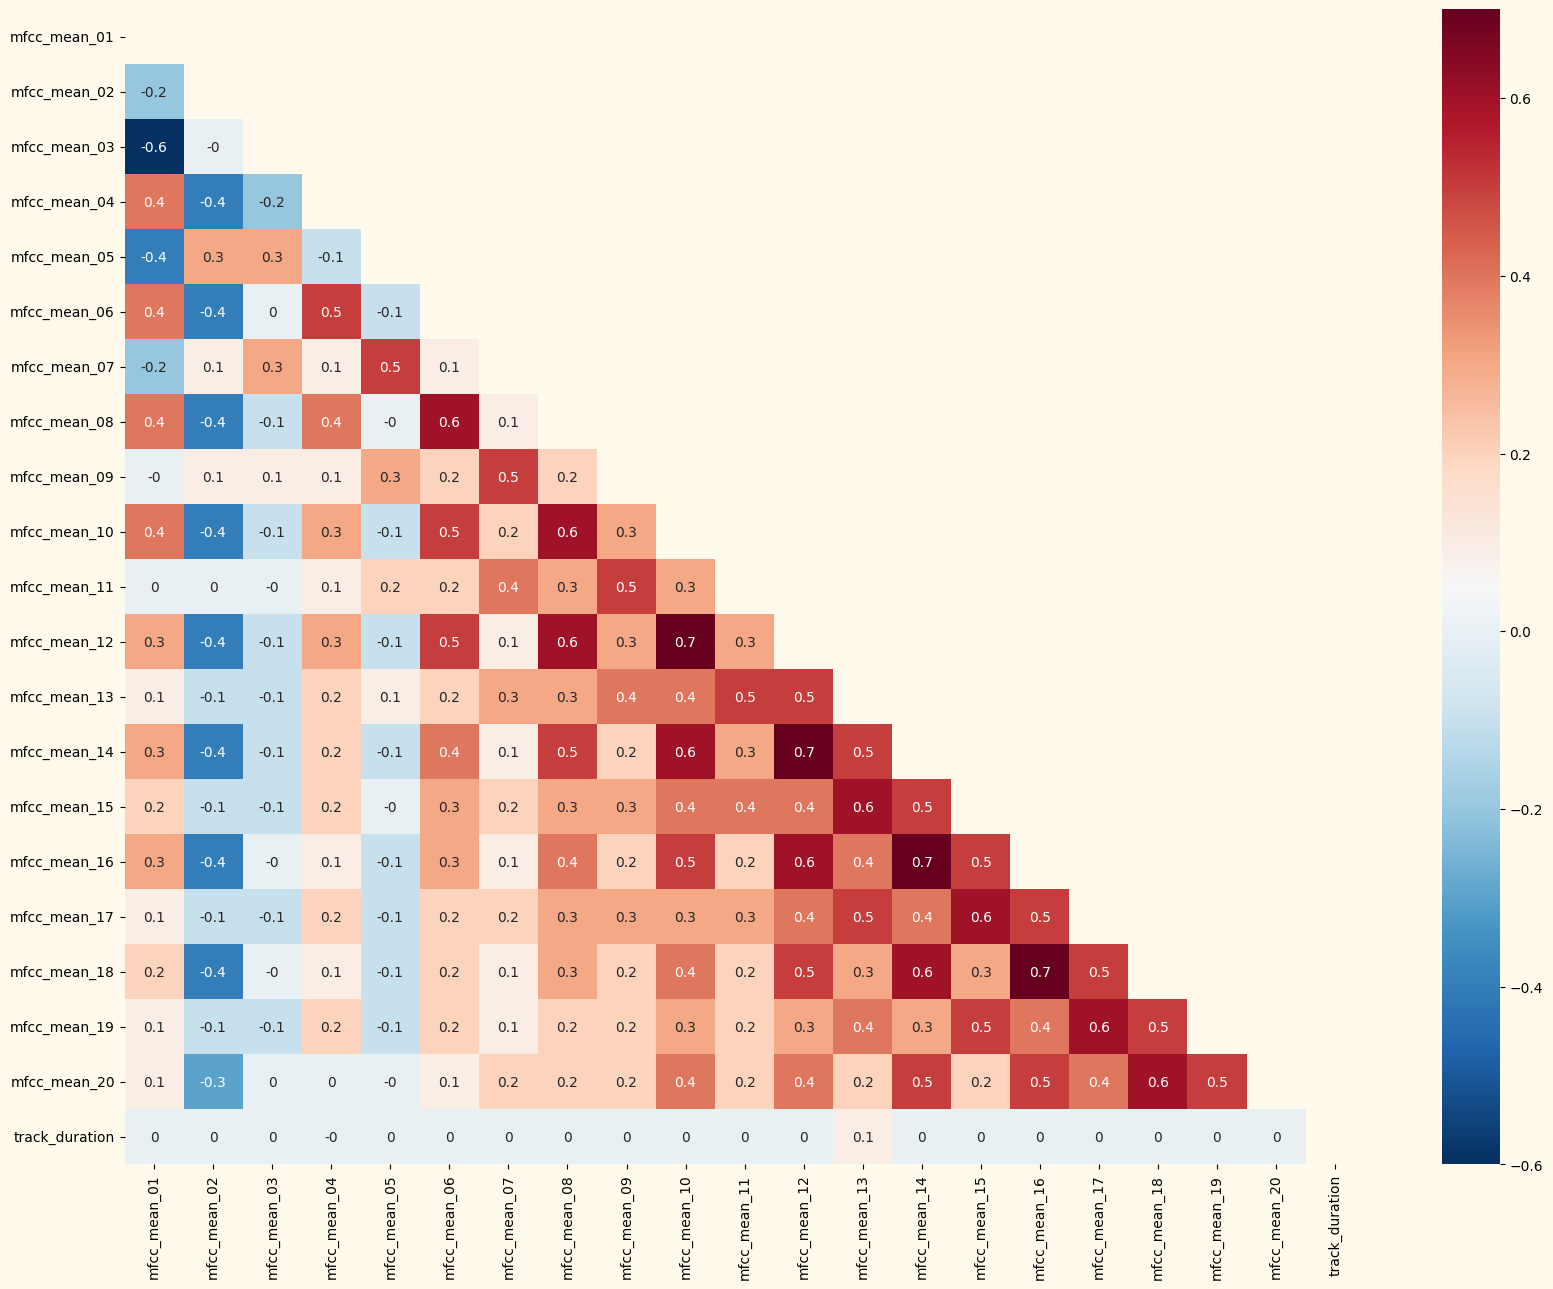

In [187]:
track_duration = df['track_duration']

df_test5 = mfcc_mean.join(track_duration, how='left')

# Plot correlation matrix 
mask = np.triu(df_test5.corr())
plt.figure(figsize = (20,15))
ax = sns.heatmap(round(df_test5.corr(), 1)
                 ,annot=True
                 ,mask=mask
                 ,cmap='RdBu_r')

### MFCC kurtosis

A statistical measure. In simpler terms, kurtosis helps to understand how much of the data is concentrated in the tails or in the central portion of the distribution.

In [188]:
# filtering for mfcc_kurtosis columns
m = df.columns.str.contains('mfcc_kurtosis')
mfcc_kurtosis = df[df.columns[m]]

In [189]:
mfcc_kurtosis

mfcc_kurtosis_01  mfcc_kurtosis_02  mfcc_kurtosis_03  mfcc_kurtosis_04  \
0             3.856789          1.541901          0.000816          0.330728   
1             2.624517          2.415293          0.440233         -0.782131   
2             5.076893          1.161854          2.095651          1.372743   
3             0.384906          1.203378          0.429393          0.639471   
4            -0.038922          4.771146         -0.378949         -0.309047   
...                ...               ...               ...               ...   
7995          0.486471          2.039885          1.065340          1.553311   
7996         -0.000699         -0.664378          1.479098          0.647598   
7997          1.811922          1.701329          0.074595          1.446981   
7998          0.823031          1.711429          0.904345          0.756484   
7999          4.009223          2.374810          3.122061          0.323748   

      mfcc_kurtosis_05  mfcc_kurtosis_06  mfcc_kurtosis_07  mfcc_kurtosis_08  \
0             0.118731         -0.342687         -0.259252          0.146735   
1            -0.771069         -0.724216          0.090260          0.152119   
2            -0.203574         -0.345354         -0.529139          0.561974   
3            -0.080144         -0.440946         -0.432567         -0.126163   
4            -0.661308         -0.531602          0.029186          0.662524   
...                ...               ...               ...               ...   
7995          1.149207          1.233508          0.740646         -0.296303   
7996          0.688074          1.628477          0.819533         -0.440711   
7997         -0.049799          0.446221         -0.056744          1.145449   
7998         -0.112708          0.160333         -0.107313         -0.201079   
7999          0.175242          0.158041          0.265011         -0.089093   

      mfcc_kurtosis_09  mfcc_kurtosis_10  mfcc_kurtosis_11  mfcc_kurtosis_12  \
0             0.410656         -0.162872         -0.029920          0.430621   
1             0.261731         -0.608905          0.096892         -0.248479   
2             0.281350         -0.150672         -0.051230         -0.189193   
3             0.507695          0.408915          0.024341          0.113680   
4            -0.084562          0.965640          0.199449         -0.041373   
...                ...               ...               ...               ...   
7995          0.002152          0.429307          0.277521          0.144607   
7996         -0.458720         -0.618500         -0.309332          0.186489   
7997         -0.152812         -0.095076         -0.100275         -0.025832   
7998         -0.288760         -0.048646          0.508852          0.510887   
7999         -0.031688          0.431877          0.333710          0.268867   

      mfcc_kurtosis_13  mfcc_kurtosis_14  mfcc_kurtosis_15  mfcc_kurtosis_16  \
0            -0.225081         -0.303092         -0.190764         -0.052871   
1             0.159848          0.637849          0.192881          0.286125   
2             0.024108          0.111374          0.178489         -0.124275   
3            -0.160073          0.272321          0.280109          0.434392   
4            -0.062308         -0.122510         -0.096526          0.042070   
...                ...               ...               ...               ...   
7995         -0.407323         -0.346851         -0.196636         -0.012651   
7996          0.489114          1.100578         -0.062102          1.075010   
7997          0.450493          0.212682          0.629677          1.494404   
7998          0.220901          0.496381          0.687257          0.801796   
7999          0.215614          0.383164          0.016557          0.196922   

      mfcc_kurtosis_17  mfcc_kurtosis_18  mfcc_kurtosis_19  mfcc_kurtosis_20  
0            -0.151794         -0.000590          0.075492          0.002595  
1   

<Axes: xlabel='mfcc_kurtosis_01', ylabel='Density'>

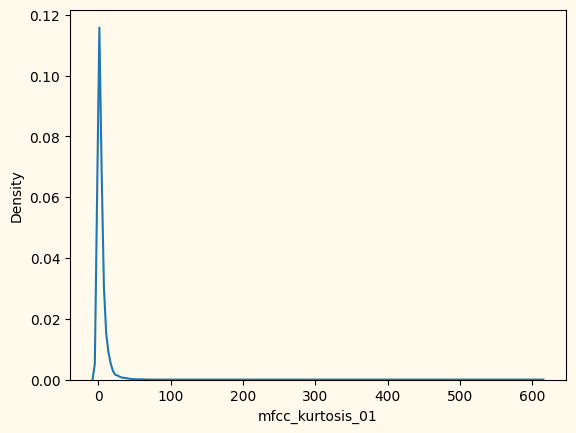

In [190]:
sns.kdeplot(mfcc_kurtosis['mfcc_kurtosis_01'])

<Axes: ylabel='Density'>

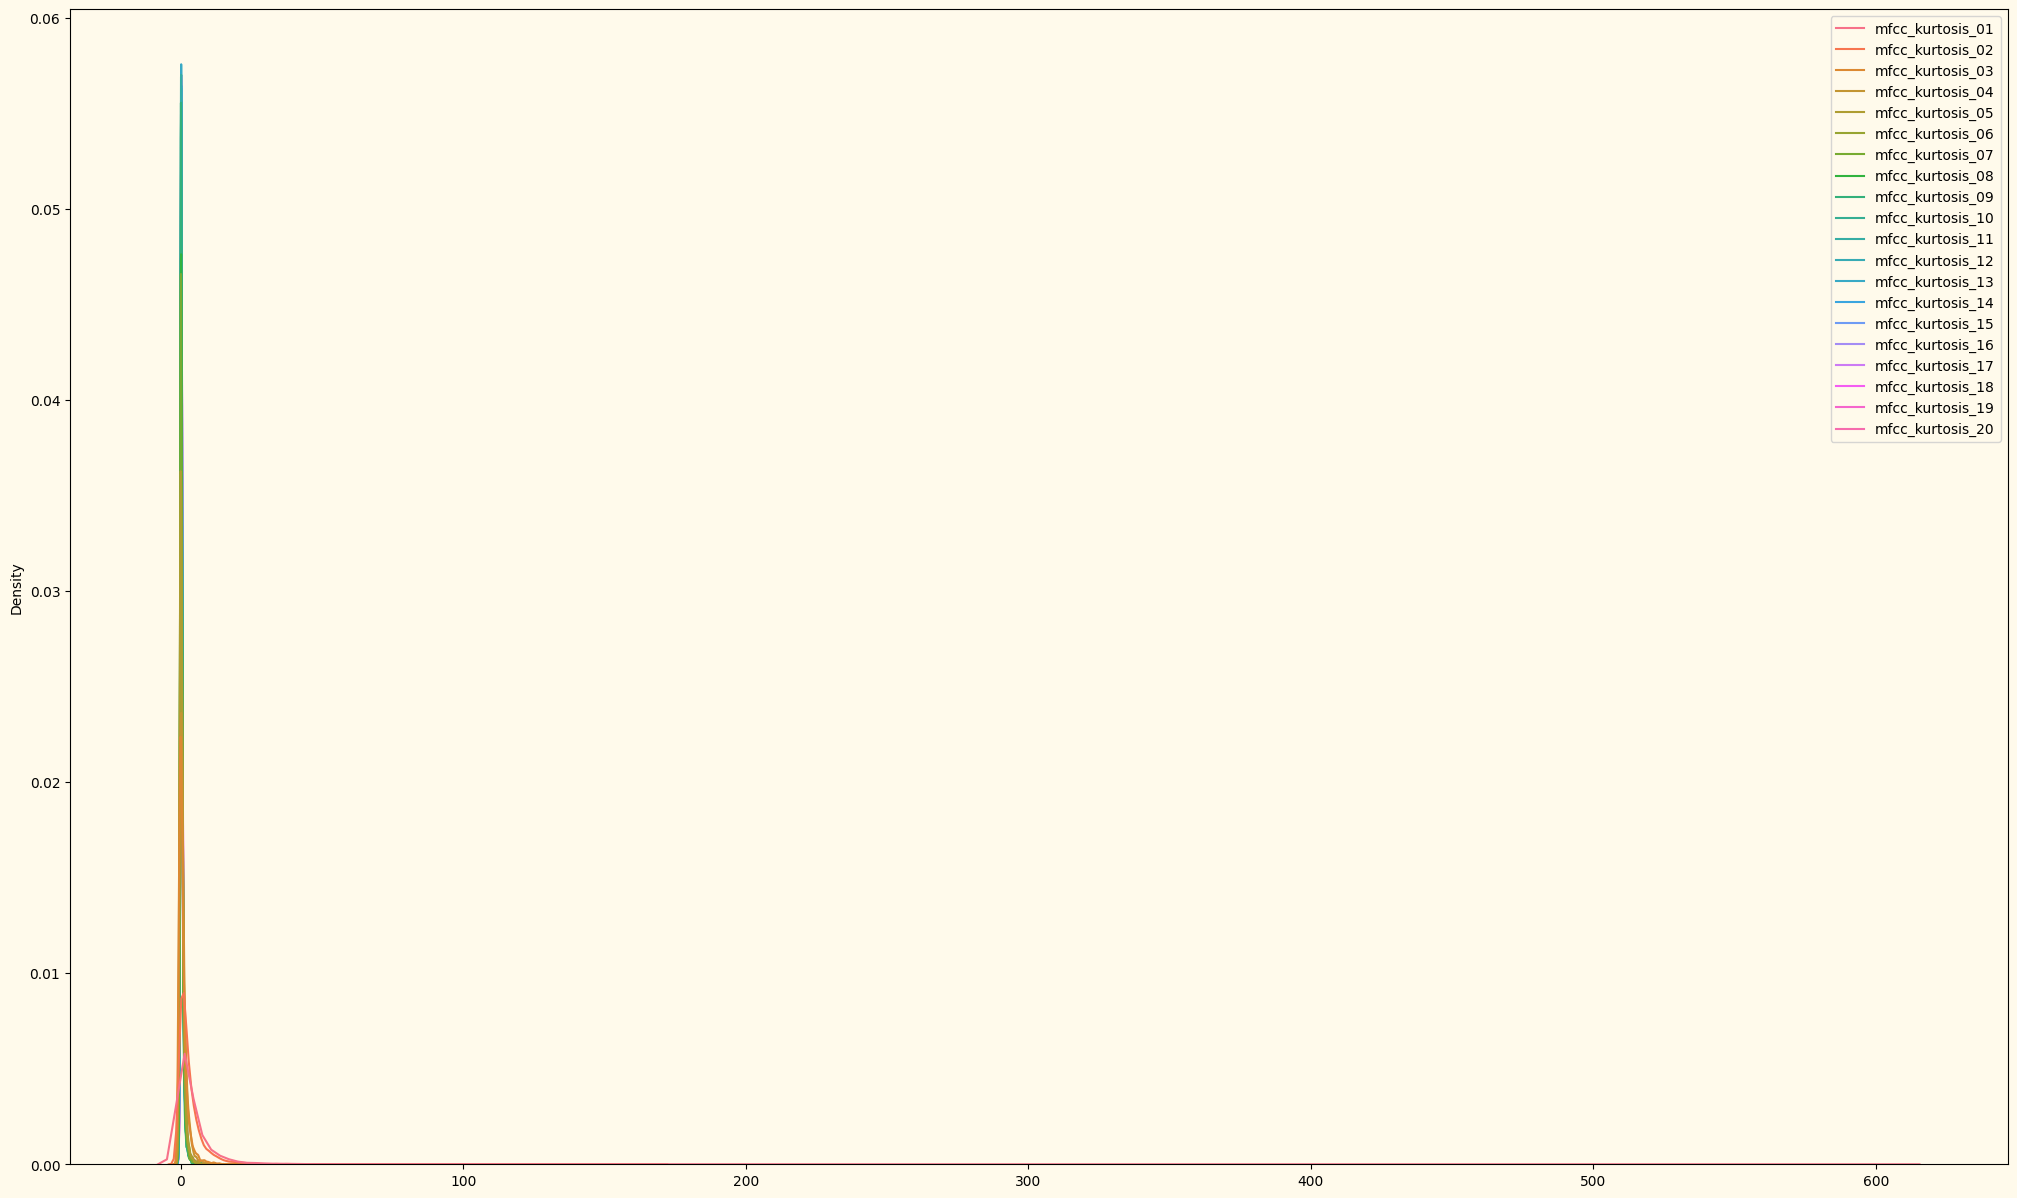

In [191]:
plt.figure(figsize=(25,15))
sns.kdeplot(data=mfcc_kurtosis)

**Sharp Peak at Around 0:** <br>
The sharp peak around 0 indicates that the data has a high concentration of values in the central region. <br>
**Long Tail Towards 600:** <br>
The long tail towards 600 suggests that there are relatively fewer but extreme values in the dataset. This contributes to the heavy tails of the distribution. <br>
**Leptokurtic Distribution:** <br>
The combination of a sharp peak and heavy tails is characteristic of a leptokurtic distribution, where the tails are fatter than those of a normal distribution.

### ZCR

Number of times signal crosses horizontal axis <br>
Recognition of percussive vs pitched sounds <br>
    Because percussions tend to have quite random ZCRs <br>

Tendency: monophonic pitch estimation (the higher ZCR, the higher the pitch (as shorter wave passes zero more often)) <br>
Voice / unvoiced decision for speech signals

#### Plotting example tracks' ZCR

In [16]:
audio_example_1 = '../../data/fma_small/023/023010.mp3'
ipd.Audio(audio_example_1)


In [193]:
audio_example_2 = '../../data/fma_small/108/108297.mp3'
ipd.Audio(audio_example_2)

In [194]:
# Loading zcr of example 1
y, sr = librosa.load(audio_example_1)
zcr_023016 = librosa.feature.zero_crossing_rate(y, frame_length=2048, hop_length=512)[0]

# Loading zcr of example 2
z, _ = librosa.load(audio_example_2)
zcr_108297 = librosa.feature.zero_crossing_rate(z, frame_length=2048, hop_length=512)[0]

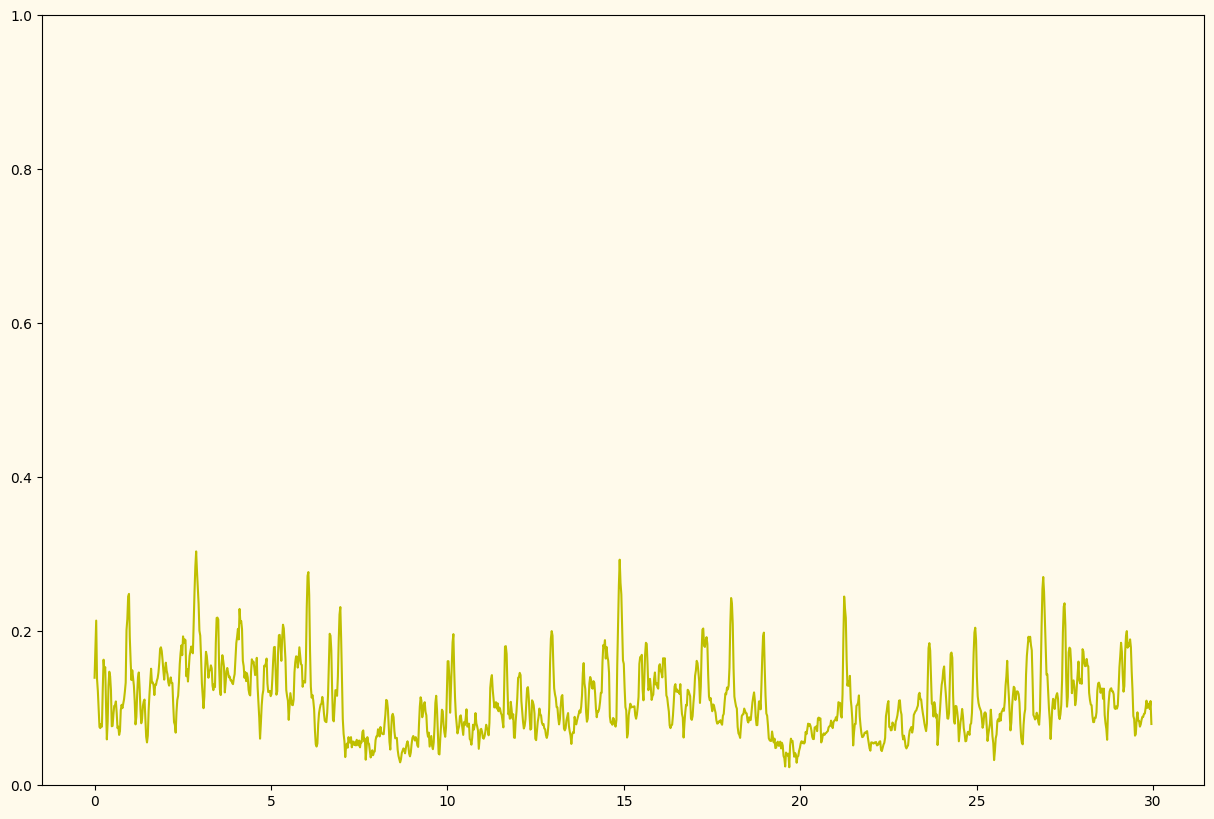

In [195]:
# Converting frames into time-domain for plotting
frames = range(len(zcr_023016))
t = librosa.frames_to_time(frames, hop_length=512)

plt.figure(figsize=(15, 10))
plt.plot(t, zcr_023016, color="y")
#plt.plot(t, zcr_108297, color="r")
plt.ylim(0, 1)
plt.show()

#### Correlation matrix between MFCC and ZCR statistical values

In [196]:
# Filtering out ZCR columns
zcr = df.columns.str.contains('zcr_')
zcr_ = df[df.columns[zcr]]

In [198]:
mfcc_zcr_mean = mfcc_mean.join(zcr_, how='left')


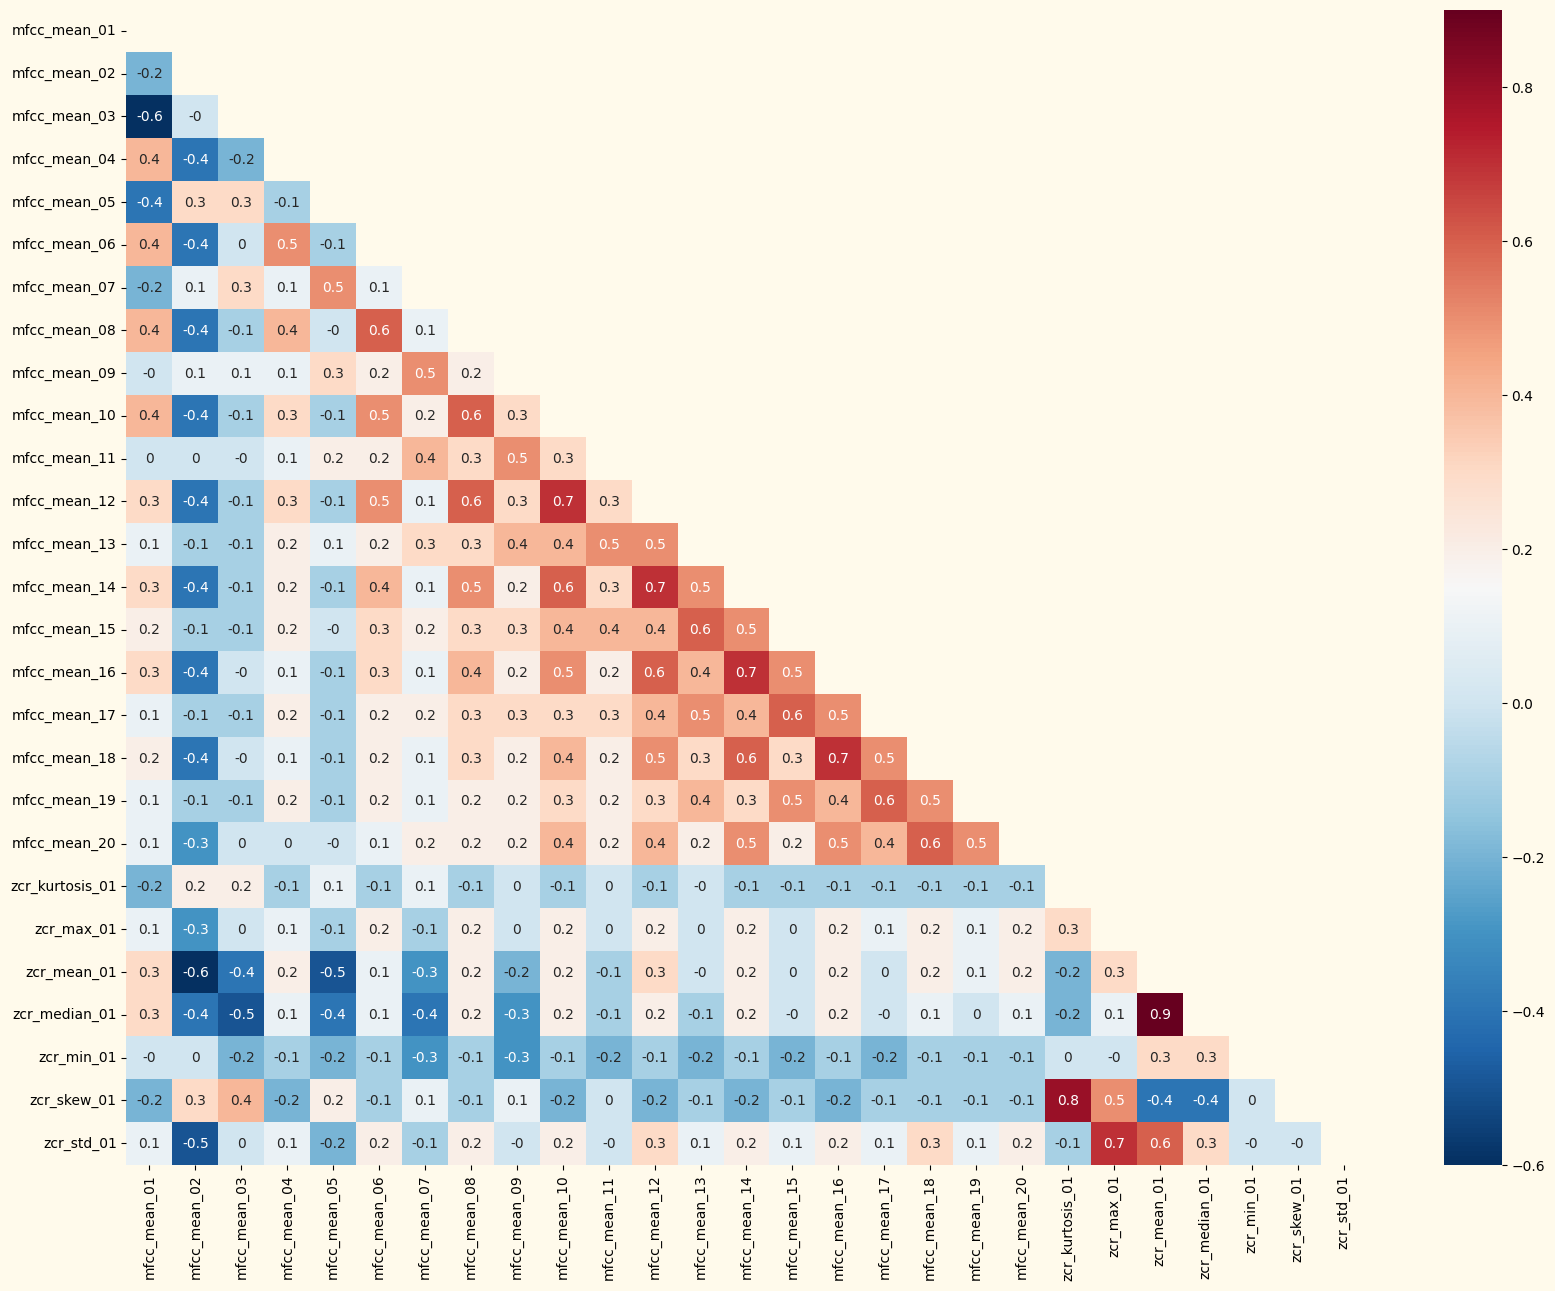

In [199]:
# Plot correlation matrix 
mask = np.triu(mfcc_zcr_mean.corr())
plt.figure(figsize = (20,15))
ax = sns.heatmap(round(mfcc_zcr_mean.corr(), 1)
                 ,annot=True
                 ,mask=mask
                 ,cmap='RdBu_r')

### RMS energy (Root Mean Square Energy)

Indicator of the average loudness of the audio signal

In [200]:
r = df.columns.str.contains('rmse_')
rmse = df[df.columns[r]]

#### RMSE mean boxplot

In [202]:
r = df.columns.str.contains('rmse_')
rmse = df[df.columns[r]]

In [203]:
df.columns[r]

Index(['rmse_kurtosis_01', 'rmse_max_01', 'rmse_mean_01', 'rmse_median_01',
       'rmse_min_01', 'rmse_skew_01', 'rmse_std_01'],
      dtype='object')

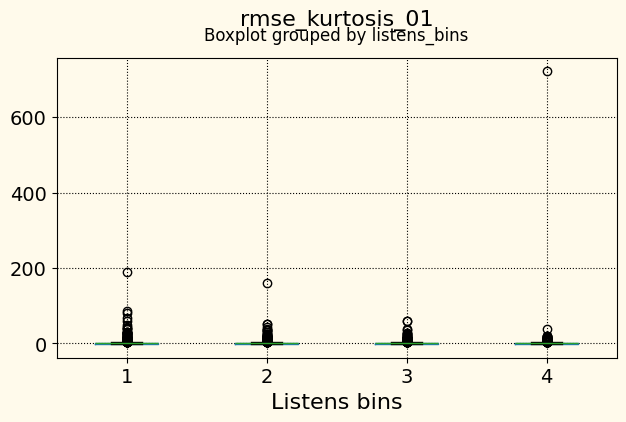

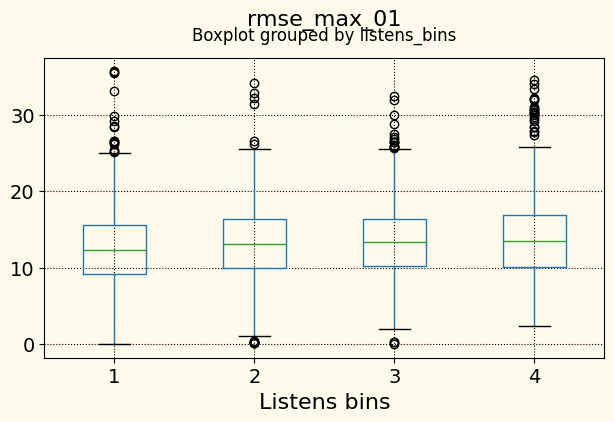

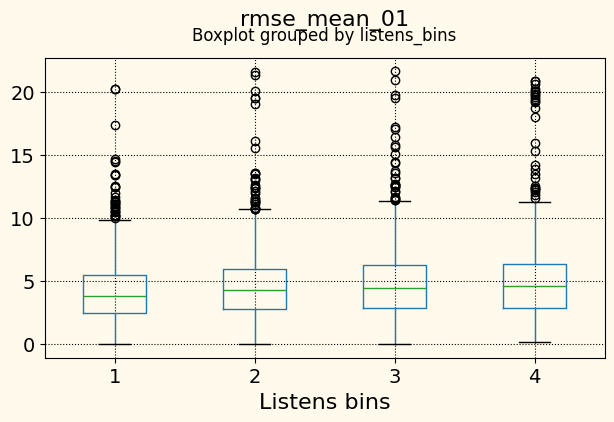

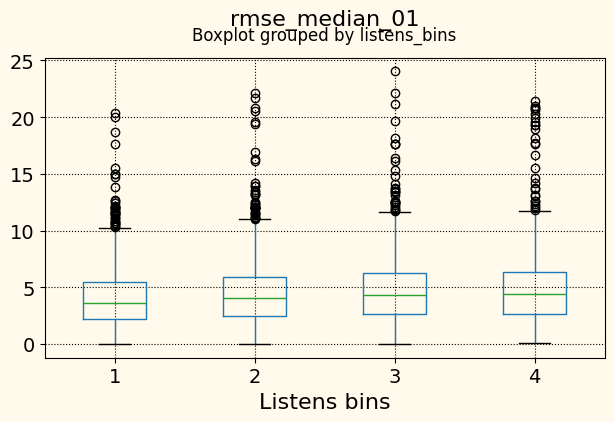

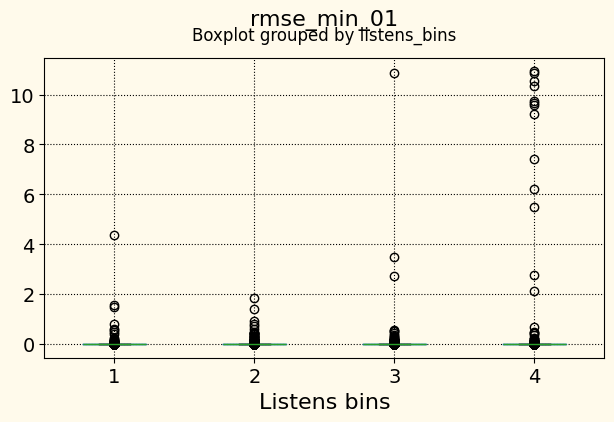

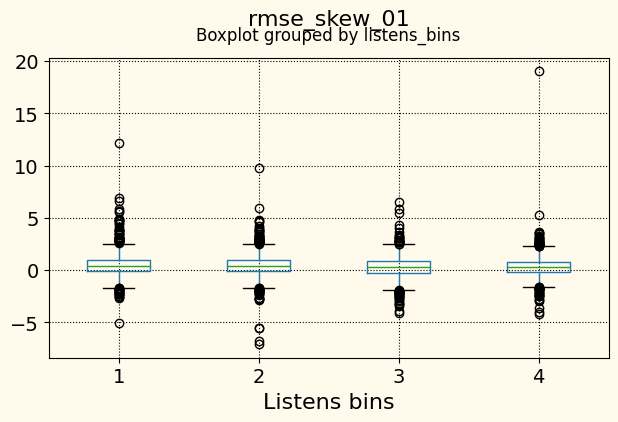

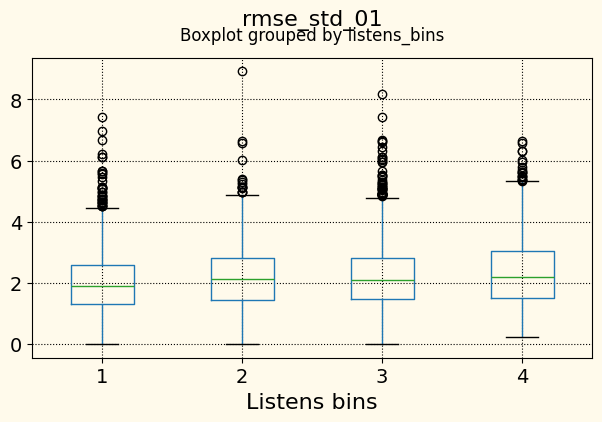

In [204]:
# boxplot by target variable 'listens_bins'
for c in df.columns[r]:
    df.boxplot(c,by='listens_bins',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Listens bins", fontsize=16)

<Axes: xlabel='rmse_mean_01', ylabel='Density'>

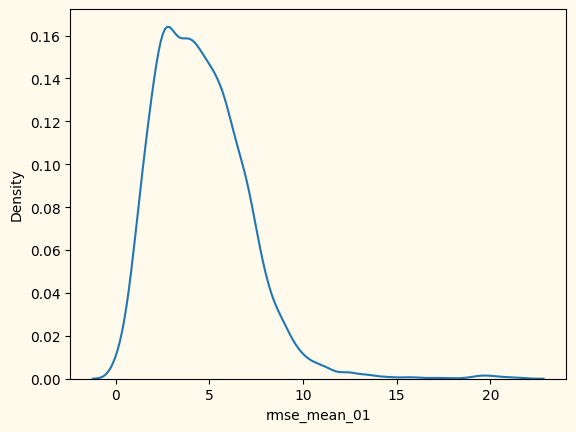

In [205]:
sns.kdeplot(rmse['rmse_mean_01'])

#### RMSE vs MFCC mean heatmap

In [206]:
mfcc_mean_rmse = mfcc_mean.join(rmse, how='left')

mfcc_mean_rmse

mfcc_mean_01  mfcc_mean_02  mfcc_mean_03  mfcc_mean_04  mfcc_mean_05  \
0      -163.772964    116.696678    -41.753826     29.144329    -15.050158   
1      -205.440491    132.215073    -16.085823     41.514759     -7.642954   
2      -135.864822    157.040085    -53.453247     17.198896      6.868035   
3      -225.713318    139.332825    -13.097699     44.533356      2.468400   
4      -253.143906    155.716324    -16.636627     23.683815      6.045957   
...            ...           ...           ...           ...           ...   
7995   -288.879303    152.342087     -2.517532      8.582313     -0.384105   
7996   -367.696625    104.314285     11.179615     -9.774891    -12.614079   
7997   -229.868378    155.606247      4.354007     45.476540     -7.373891   
7998   -225.491821    156.149582     -4.608137     42.489342     -8.574591   
7999   -291.700775    160.115982     93.731789     49.252903     -0.456035   

      mfcc_mean_06  mfcc_mean_07  mfcc_mean_08  mfcc_mean_09  mfcc_mean_10  \
0        18.879372     -8.918165     12.002118     -4.253151      1.359791   
1        16.942802     -5.651261      9.569445      0.503157      8.673513   
2        13.934344    -11.749298      8.360711     -5.130381      0.233845   
3        28.328743     -9.931481     10.810857      3.002879     -0.937692   
4        11.692952     -9.947761      6.887814     -3.273322     -6.340906   
...            ...           ...           ...           ...           ...   
7995      4.368904      3.391255      5.985993      9.245567      4.665963   
7996      1.173940    -10.825560    -10.481558    -12.770616     -8.729056   
7997     22.758905      2.523344      9.925150      7.117429      1.199985   
7998     10.030898     -9.780822     -1.589058      3.073855      3.905075   
7999     -8.281082    -12.962958     -2.272800      1.398377     -0.398876   

      ...  mfcc_mean_18  mfcc_mean_19  mfcc_mean_20  rmse_kurtosis_01  \
0     ...     -2.114676      0.116842     -5.785884          2.499856   
1     ...     -1.739911      0.278015     -5.489016          0.001781   
2     ...     -1.018324     -3.807545     -0.679533          1.766149   
3     ...     -2.363509     -0.158602      0.594098          0.039184   
4     ...      0.768126      2.809321      3.325740          0.793123   
...   ...           ...           ...           ...               ...   
7995  ...      2.550121      5.137365      6.354999          4.504900   
7996  ...     -5.277195     -9.561085     -8.861394          3.123834   
7997  ...      1.281081      4.305267      0.595658          0.589548   
7998  ...     -4.390033     -2.679048     -5.389973          1.149240   
7999  ...      2.405217      2.127824      3.123198          1.957244   

      rmse_max_01  rmse_mean_01  rmse_median_01  rmse_min_01  rmse_skew_01  \
0       14.748096      3.188761        2.653895     0.000000      1.565426   
1       11.031059      3.251386        2.409692     0.000000      1.026818   
2       12.318485      3.893810        3.756495     0.000000      0.825354   
3       11.942680      2.953848        2.969233     0.000410      0.405873   
4       12.763116      2.576761        1.925910     0.000008      1.065473   
...           ...           ...             ...          ...           ...   
7995    12.575085      2.174565        2.053556     0.000814      1.940014   
7996    10.110662      1.548146        0.670952     0.000817      1.742179   
7997     8.627766      4.202268        4.333341     0.000184     -0.680714   
7998    10.597846      2.938613        2.924310     0.000143      0.313113   
7999    19.408745      6.361063        6.760508     0.000000      0.700663   

      rmse_std_01  
0        2.536809  
1        2.585286  
2        2.004721  
3        1.808950  
4        2.069247  
...           ...  
7995     1.920691  
7996     1.892470  
7997     1.175084  
7998     1.244516  
7999     3.208751  

[8000 rows x 27 columns]

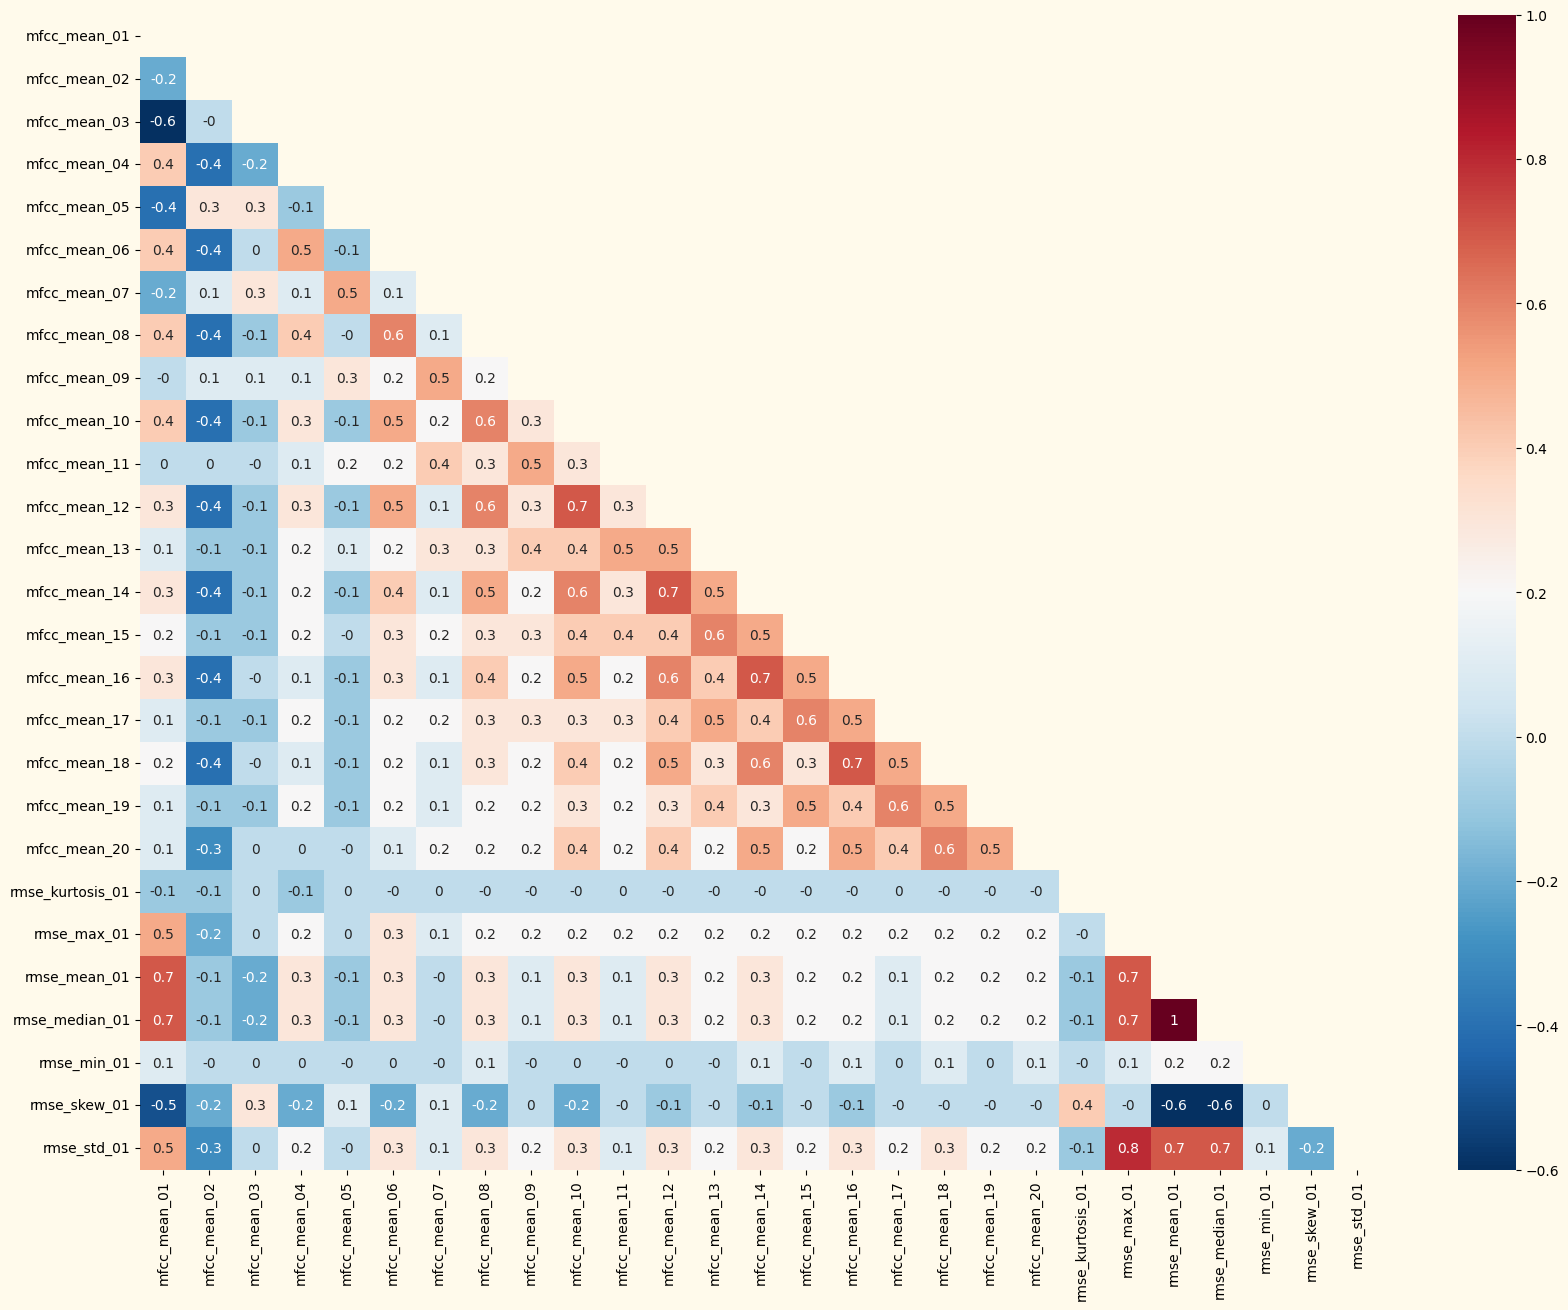

In [207]:
# Plot correlation matrix 
mask = np.triu(mfcc_mean_rmse.corr())
plt.figure(figsize = (20,15))
ax = sns.heatmap(round(mfcc_mean_rmse.corr(), 1)
                 ,annot=True
                 ,mask=mask
                 ,cmap='RdBu_r')

<Axes: xlabel='rmse_mean_01', ylabel='mfcc_mean_01'>

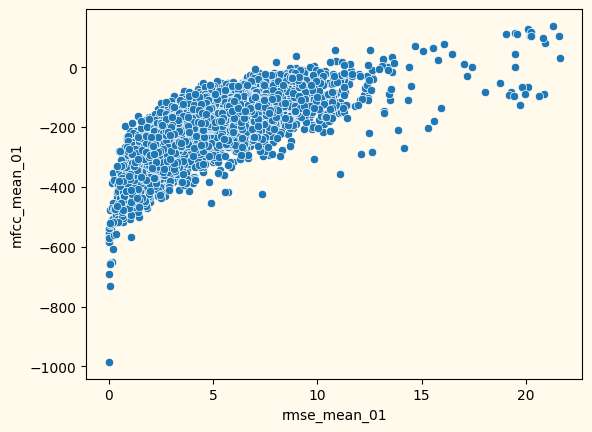

In [208]:
sns.scatterplot(mfcc_mean_rmse, x='rmse_mean_01', y='mfcc_mean_01')

If a cepstral coefficient (mfcc) has a positive value, the majority of the spectral energy is concentrated in the low-frequency regions. On the other hand, if a cepstral coefficient has a negative value, it represents that most of the spectral energy is concentrated at high frequencies.

**The RMS value is a measure of the energy or amplitude of a signal. In the context of audio signals, low-frequency components typically represent the bass or low-pitched sounds, which often have higher energy because they involve larger oscillations.**

### Spectral Centroid

Spectral Centroid indicates the average frequency where the energy of the signal concentrates.
It can be used as a descriptor for brightness or the perceived tonal center of a signal.


In [209]:
# Filtering out spectral centroid columns

s = df.columns.str.contains('spectral_centroid')
spectral_centroid = df[df.columns[s]]
spectral_centroid

spectral_centroid_kurtosis_01  spectral_centroid_max_01  \
0                          2.406808               5514.049805   
1                          1.322586               5648.614746   
2                          9.729688               5739.394531   
3                          2.917819               4728.459961   
4                          7.013360               5497.614746   
...                             ...                       ...   
7995                      34.271126               7580.148438   
7996                       2.239239               7621.093262   
7997                       3.042266               5625.551269   
7998                      12.364185               6950.563477   
7999                      28.094217               6979.730469   

      spectral_centroid_mean_01  spectral_centroid_median_01  \
0                   1639.583252                  1503.496704   
1                   1292.958130                  1186.514038   
2                   1360.028687                  1180.966797   
3                   1232.633789                  1068.719605   
4                    941.244141                   860.683472   
...                         ...                          ...   
7995                 867.595581                   682.571899   
7996                1640.368896                   899.596130   
7997                 969.229065                   750.382141   
7998                1041.238892                   879.450439   
7999                 488.150360                   246.464401   

      spectral_centroid_min_01  spectral_centroid_skew_01  \
0                     0.000000                   1.079815   
1                     0.000000                   0.937101   
2                     0.000000                   2.523783   
3                   172.106689                   1.610563   
4                   198.165558                   1.933955   
...                        ...                        ...   
7995                 65.477097                   5.146722   
7996                333.360321                   1.685168   
7997                 92.757980                   1.820569   
7998                128.906387                   2.758756   
7999                  0.000000                   4.600840   

      spectral_centroid_std_01  
0                   719.770508  
1                   665.319275  
2                   668.700806  
3                   726.773254  
4                   442.332092  
...                        ...  
7995                880.350342  
7996               1641.757812  
7997                722.624573  
7998                716.394409  
7999                677.203064  

[8000 rows x 7 columns]

In [210]:
ipd.Audio(audio_example_1)

In [211]:
# Extracting spectral centroid of audio example 1 (defined earlier)

sc_audio_example_1 = librosa.feature.spectral_centroid(y=y, sr=_, n_fft=2048, hop_length=512)[0]

#### Visualizing spectral centroid of a song

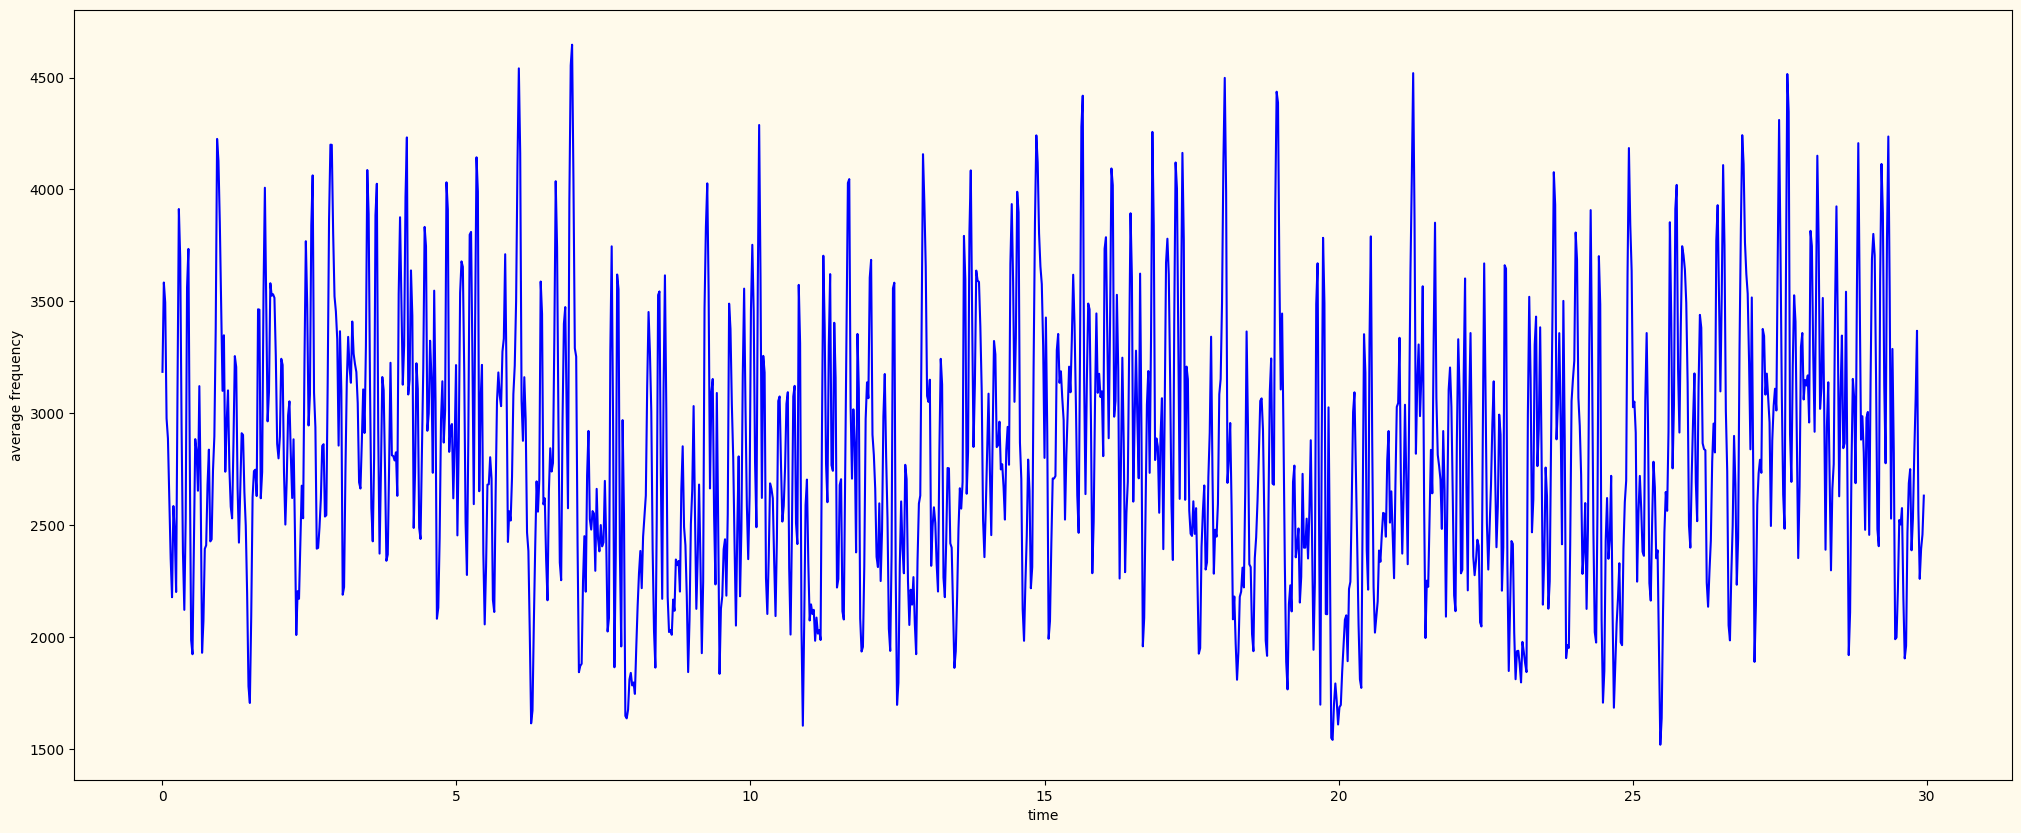

In [213]:
plt.figure(figsize=(25,10))

plt.plot(t, sc_audio_example_1, color='b')
plt.xlabel('time')
plt.ylabel('average frequency')
plt.show()

### Spectral Bandwidth

In [214]:
sb_audio_example_1 = librosa.feature.spectral_bandwidth(y=y, sr=_, n_fft=2048, hop_length=512)[0]

In [215]:
sb_audio_example_1.shape

(1291,)

#### Visualize bandwidth   

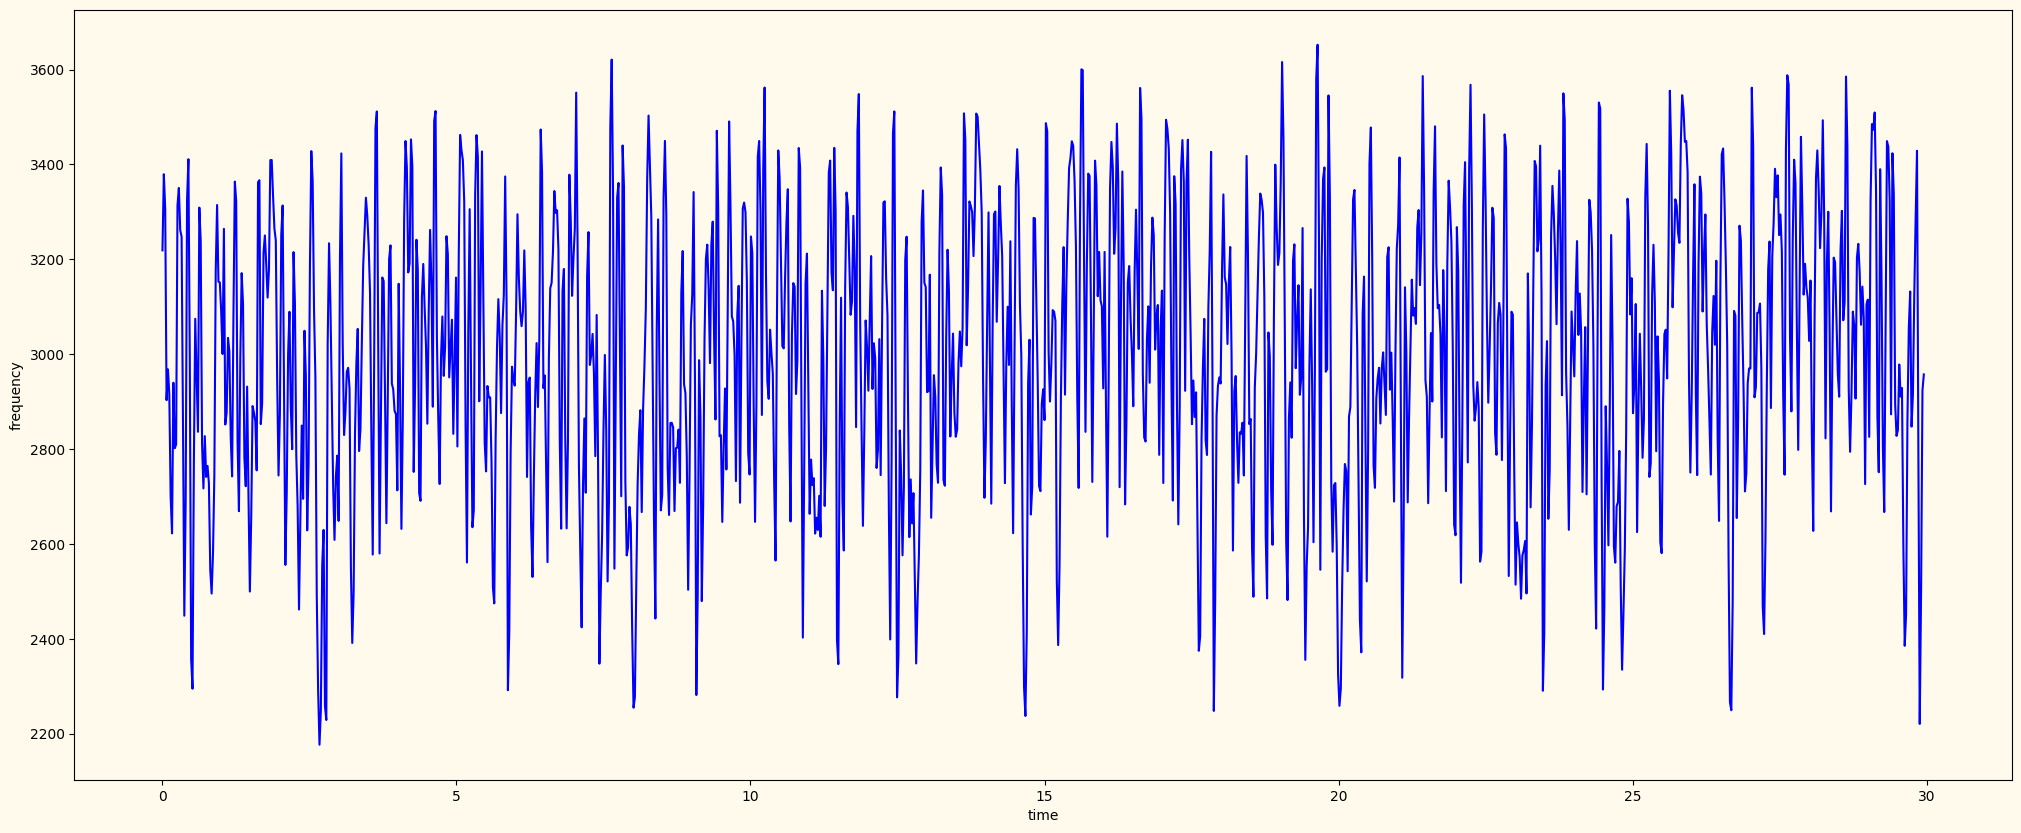

In [216]:
plt.figure(figsize=(25,10))
# Reminder t was defined above when plotting ZCR
plt.plot(t, sb_audio_example_1, color='b')
plt.xlabel('time')
plt.ylabel('frequency')
plt.show()

### Chroma

In [217]:
track_id_column = df['track_id']

In [218]:
ch = df.columns.str.contains('chroma_cens_mean')
chroma_ = df[df.columns[ch]]
chroma_with_track_id = pd.concat([track_id_column, chroma_], axis=1)

In [219]:
chroma_with_track_id

track_id  chroma_cens_mean_01  chroma_cens_mean_02  chroma_cens_mean_03  \
0            2             0.474300             0.369816             0.236119   
1            5             0.258420             0.303385             0.250737   
2           10             0.229882             0.286978             0.240096   
3          140             0.161163             0.272767             0.295905   
4          141             0.150417             0.155785             0.217253   
...        ...                  ...                  ...                  ...   
7995    154308             0.216106             0.297816             0.182945   
7996    154309             0.178323             0.162517             0.254907   
7997    154413             0.430852             0.323965             0.195708   
7998    154414             0.210741             0.192575             0.183639   
7999    155066             0.136809             0.171252             0.201039   

      chroma_cens_mean_04  chroma_cens_mean_05  chroma_cens_mean_06  \
0                0.228068             0.222830             0.221415   
1                0.218562             0.245743             0.236018   
2                0.226792             0.192443             0.288410   
3                0.255588             0.260886             0.252854   
4                0.224969             0.273518             0.295436   
...                   ...                  ...                  ...   
7995             0.113047             0.134135             0.251873   
7996             0.313140             0.280439             0.297025   
7997             0.174197             0.185026             0.188289   
7998             0.341872             0.391506             0.275378   
7999             0.236461             0.207129             0.244300   

      chroma_cens_mean_07  chroma_cens_mean_08  chroma_cens_mean_09  \
0                0.229238             0.248795             0.196245   
1                0.275766             0.293982             0.346324   
2                0.413348             0.349137             0.268424   
3                0.193282             0.191970             0.291551   
4                0.259958             0.181313             0.177233   
...                   ...                  ...                  ...   
7995             0.292571             0.243670             0.331209   
7996             0.333027             0.312327             0.168512   
7997             0.202722             0.181370             0.181159   
7998             0.146376             0.158171             0.199843   
7999             0.264961             0.249112             0.232185   

      chroma_cens_mean_10  chroma_cens_mean_11  chroma_cens_mean_12  
0                0.175809             0.200713             0.319972  
1                0.289821             0.246368             0.220939  
2                0.243144             0.268941             0.236763  
3                0.319938             0.198516             0.120607  
4                0.296048             0.331963             0.218315  
...                   ...                  ...                  ...  
7995             0.318222             0.216628             0.087350  
7996             0.084196             0.144262             0.211118  
7997             0.136803             0.114893             0.155412  
7998             0.172723             0.194244             0.248671  
7999             0.273339             0.275638             0.210567  

[8000 rows x 13 columns]

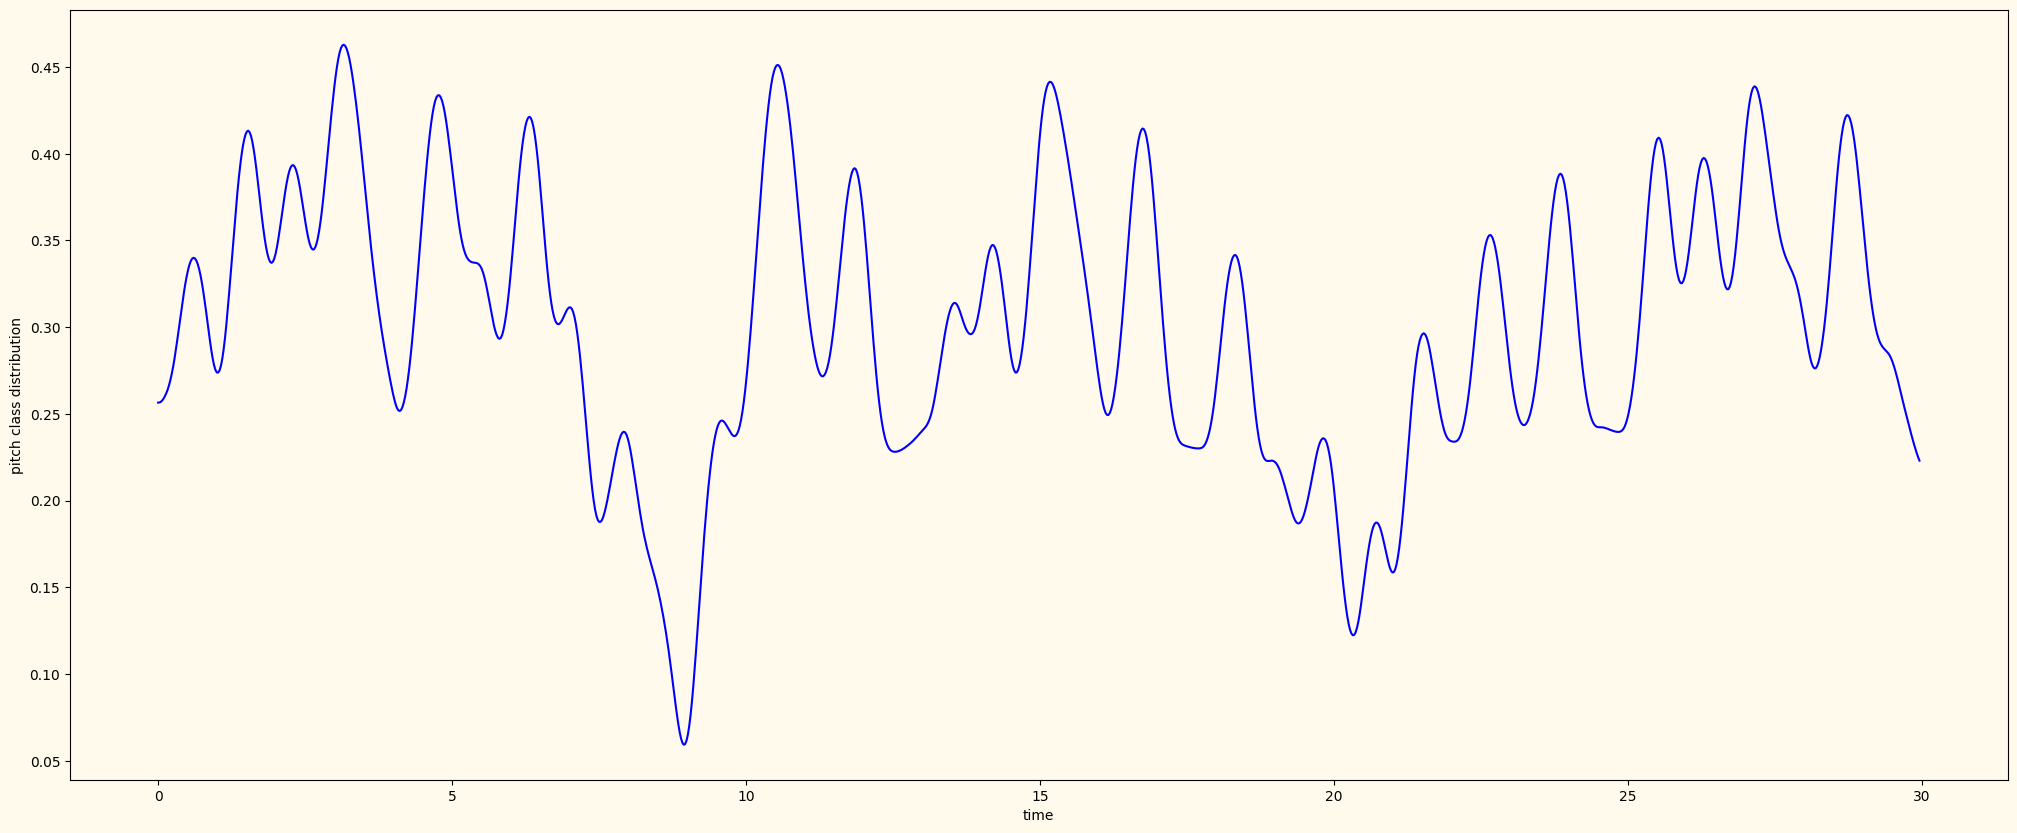

In [220]:
chroma_cens_audio_example_1 = librosa.feature.chroma_cens(y=y, sr=_, hop_length=512)[0]

plt.figure(figsize=(25,10))

plt.plot(t, chroma_cens_audio_example_1, color='b')
plt.xlabel('time')
plt.ylabel('pitch class distribution')
plt.show()

## Audio features plot 1: RMSE_mean against listens_bins

<Figure size 1200x400 with 0 Axes>

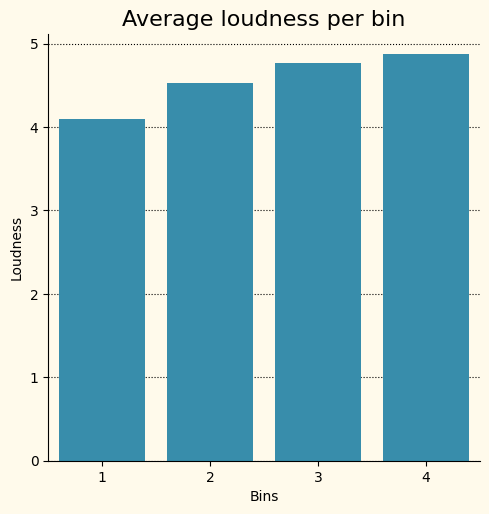

In [18]:
# listen_bins vs rmse_mean_01 (mean here is for the average across one audio file)
test = df[['listens_bins', 'rmse_mean_01']]
x = test.groupby(by='listens_bins').mean()
x 
# the more listens the higher the overall average rmse_mean_01 

# test the style and color palette
plt.figure(figsize=(12, 4))
sns.set_style(rc={'axes.facecolor':'#fffaeb', 
                  'figure.facecolor':'#fffaeb',
                  'axes.edgecolor': 'black',
                  'axes.grid': True,
                  'grid.color': '#000000',
                  'grid.linestyle': ':',
                  'font.family': ['sans-serif']
                  })


# plot do in matplotlib
sns.catplot(data=x, x='listens_bins', y='rmse_mean_01', kind='bar', zorder=2, color='#2596be') # zorder makes plots to be drawn secondly after the grid lines



# set labels, title etc.
plt.xlabel("Bins")
plt.ylabel("Loudness")
plt.title("Average loudness per bin", fontsize=16)


# show the plot
plt.show()

In [19]:
x.reset_index(inplace=True)
x

listens_bins  rmse_mean_01
0             1      4.099394
1             2      4.524717
2             3      4.765724
3             4      4.868933

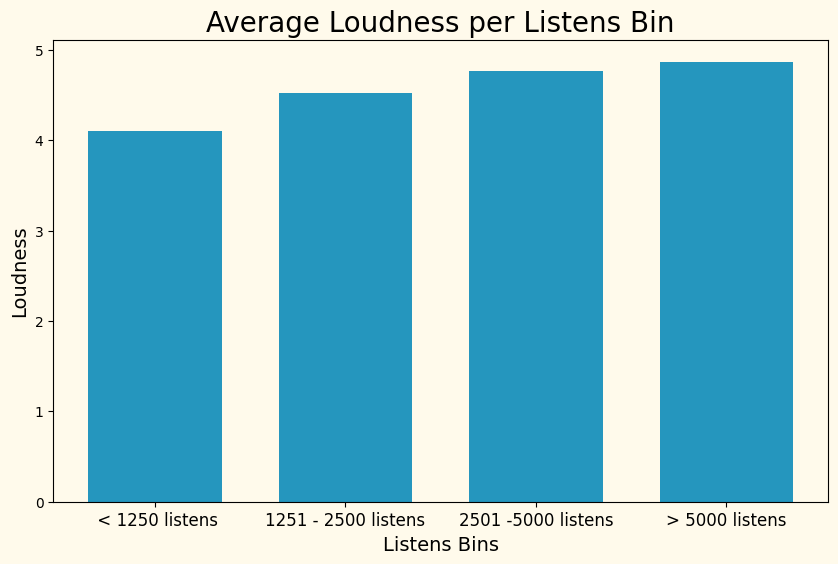

In [20]:
# Setting style
plt.style.use({
    'axes.facecolor': '#fffaeb',
    'figure.facecolor': '#fffaeb',
    'axes.edgecolor': 'black',
    'axes.grid': False,
    'grid.color': '#000000',
    'grid.linestyle': ':',
    'font.family': ['sans-serif']
})

# Creating a bar plot with proper categorical positioning
x['listens_bins'] = pd.Categorical(x['listens_bins'], categories=x['listens_bins'], ordered=True)
x = x.sort_values('listens_bins')
plt.figure(figsize=(10, 6))

# Adjusting the width of the bars and add separation between them
bar_width = 0.7
bar_separation = 0.1
x_positions = range(len(x['listens_bins']))

plt.bar(x_positions, height=x['rmse_mean_01'], color='#2596be', zorder=2, width=bar_width)

# Setting custom x-axis tick labels
custom_labels = [' < 1250 listens', '1251 - 2500 listens', '2501 -5000 listens', '> 5000 listens']
plt.xticks(x_positions, custom_labels, fontsize=12)

# Setting labels, title, etc.
plt.xlabel("Listens Bins", fontsize=14)
plt.ylabel("Loudness", fontsize=14)
plt.title("Average Loudness per Listens Bin", fontsize=20)

# Showing the plot
plt.show()

## Audio features plot 2: zcr_means against listens_bins

In [21]:
# Listen_bins vs zcr_mean_01
test = df[['listens_bins', 'zcr_mean_01']]
z = test.groupby(by='listens_bins').mean()

z.reset_index(inplace=True)
z
# Pretty stable relationship of ZCR across all bins

listens_bins  zcr_mean_01
0             1     0.050739
1             2     0.051375
2             3     0.050935
3             4     0.050344

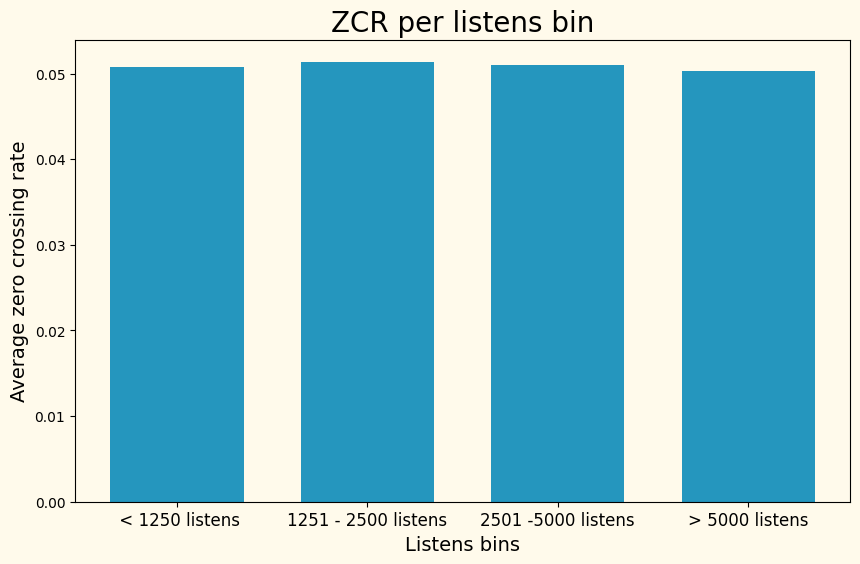

In [22]:
# Creating a bar plot with proper categorical positioning
z['listens_bins'] = pd.Categorical(x['listens_bins'], categories=z['listens_bins'], ordered=True)
z = z.sort_values('listens_bins')
plt.figure(figsize=(10, 6))

# Adjusting the width of the bars and add separation between them
bar_width = 0.7
bar_separation = 0.1
z_positions = range(len(x['listens_bins']))

plt.bar(z_positions, height=z['zcr_mean_01'], color='#2596be', zorder=2, width=bar_width)

# Setting custom x-axis tick labels
custom_labels = [' < 1250 listens', '1251 - 2500 listens', '2501 -5000 listens', '> 5000 listens']
plt.xticks(x_positions, custom_labels, fontsize=12)

# Setting labels, title, etc.
plt.xlabel("Listens bins", fontsize=14)
plt.ylabel("Average zero crossing rate", fontsize=14)
plt.title("ZCR per listens bin", fontsize=20)

# Showing the plot
plt.show()

### Pairplot with 1-dimensional audio features and listens_bins

In [141]:
list_features = ['listens_bins', 'zcr_mean_01', 'spectral_centroid_mean_01', 'spectral_bandwidth_mean_01', 'spectral_rolloff_mean_01', 'rmse_mean_01']
                #'chroma_cens_mean_01', 'chroma_cqt_mean_01', 'chroma_stft_mean_01']
                #'mfcc_mean_01', 'mfcc_mean_02', 'mfcc_mean_03', 'mfcc_mean_04',
                #'mfcc_mean_05', 'mfcc_mean_06', 'mfcc_mean_07', 'mfcc_mean_08',
                #'mfcc_mean_09', 'mfcc_mean_10', 'mfcc_mean_11', 'mfcc_mean_12']
                #'mfcc_mean_13', 'mfcc_mean_14', 'mfcc_mean_15', 'mfcc_mean_16'
                #'mfcc_mean_17', 'mfcc_mean_18', 'mfcc_mean_19', 'mfcc_mean_20']

In [142]:
correlation_df = df[list_features]

In [143]:
correlation_df

listens_bins  zcr_mean_01  spectral_centroid_mean_01  \
0                2     0.085629                1639.583252   
1                1     0.053114                1292.958130   
2                4     0.077515                1360.028687   
3                2     0.052379                1232.633789   
4                1     0.040267                 941.244141   
...            ...          ...                        ...   
7995             4     0.042997                 867.595581   
7996             4     0.082979                1640.368896   
7997             2     0.024532                 969.229065   
7998             2     0.046116                1041.238892   
7999             3     0.016058                 488.150360   

      spectral_bandwidth_mean_01  spectral_rolloff_mean_01  rmse_mean_01  
0                    1607.474365               3267.804688      3.188761  
1                    1512.917358               2773.931885      3.251386  
2                    1420.259644               2603.491943      3.893810  
3                    1475.625366               2583.014160      2.953848  
4                    1192.835571               1905.394531      2.576761  
...                          ...                       ...           ...  
7995                 1094.472168               1568.987427      2.174565  
7996                 1629.846924               2929.730225      1.548146  
7997                 1406.540161               2049.317871      4.202268  
7998                 1301.971924               2065.772705      2.938613  
7999                  930.166199                865.742981      6.361063  

[8000 rows x 6 columns]

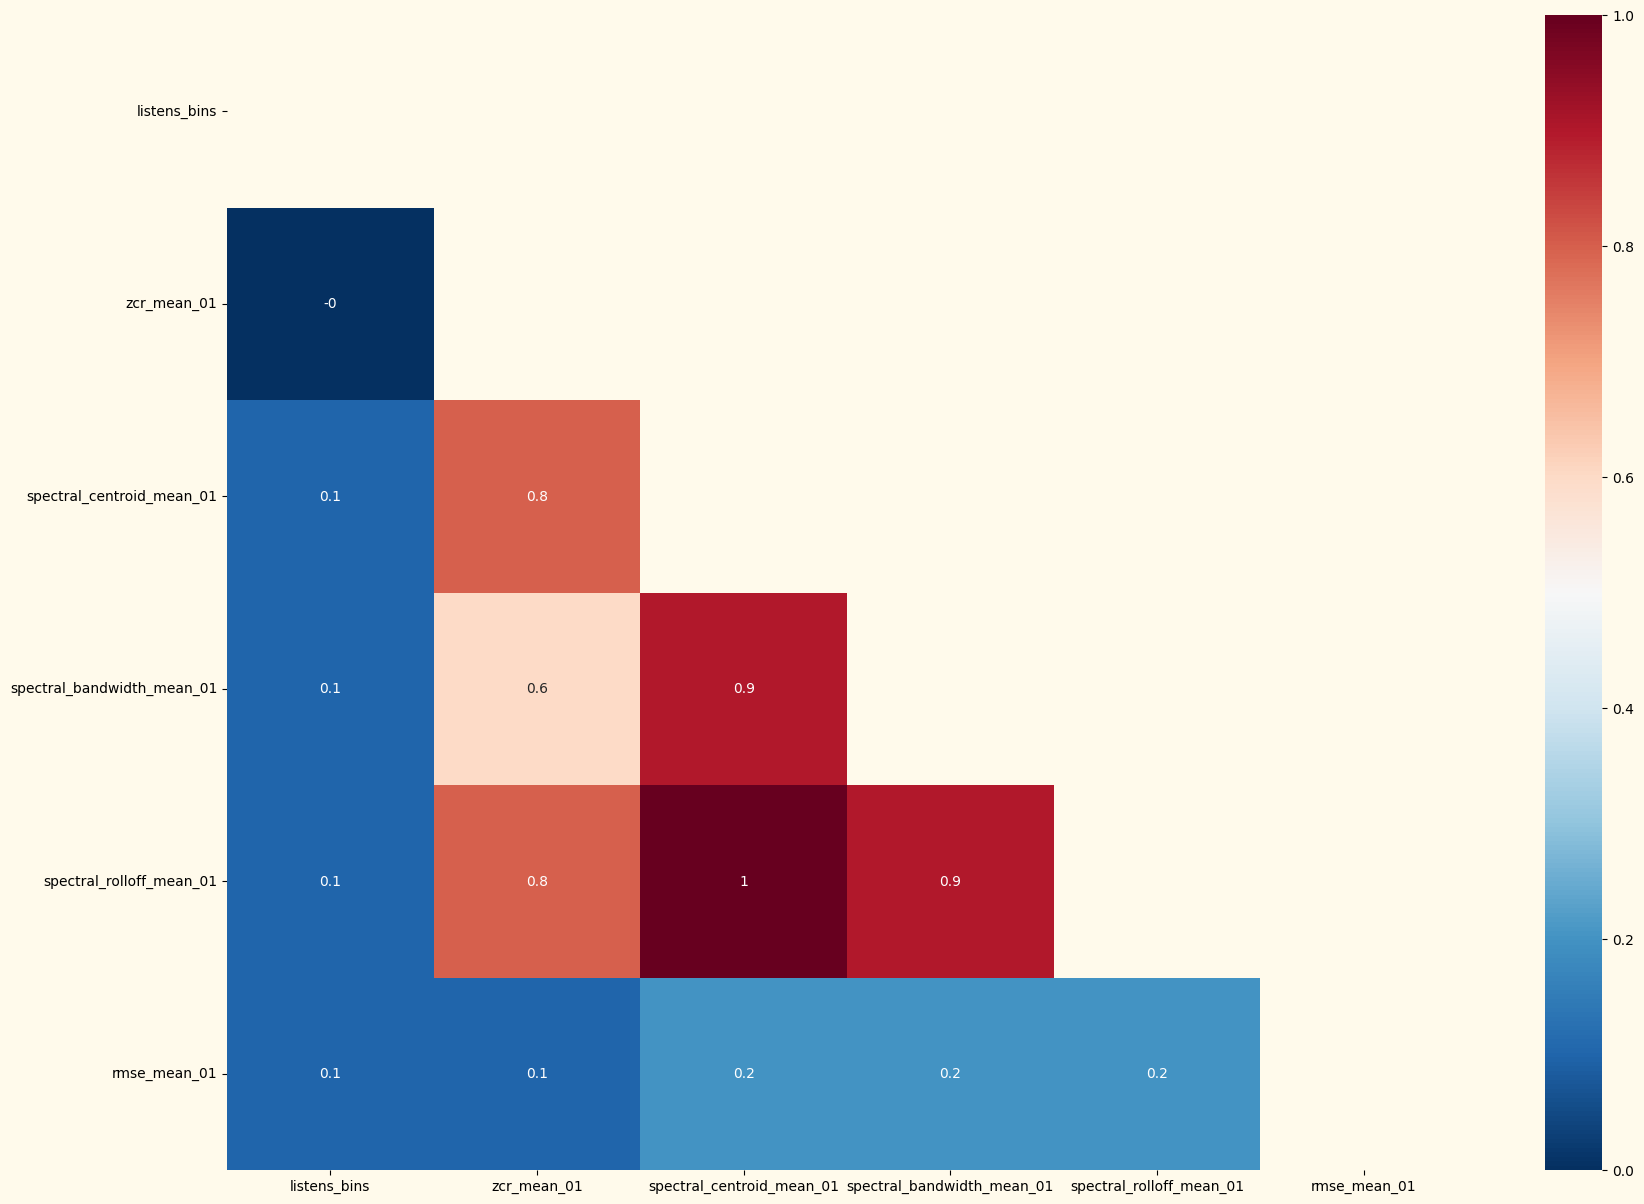

In [144]:
# plot correlation matrix 
mask = np.triu(correlation_df.corr())
plt.figure(figsize = (20,15))
ax = sns.heatmap(round(correlation_df.corr(), 1)
                 ,annot=True
                 ,mask=mask
                 ,cmap='RdBu_r'
                 ,zorder=2)

## Calculate MFCC for one track

In [24]:
# Assigning audio file to variable

audio_file = '../../data/fma_small/000/000002.mp3'

In [25]:
# Previewing audio

ipd.Audio(audio_file)

In [30]:
# Loading audio file with Librosa which will result into y- samples and sample rate sr

y, sr = librosa.load(audio_file)

In [31]:
# extract 20 mfcc's
mfccs = librosa.feature.mfcc(y=y, n_mfcc = 20, sr=sr)

In [32]:
mfccs.shape

(20, 1291)

<function matplotlib.pyplot.show(close=None, block=None)>

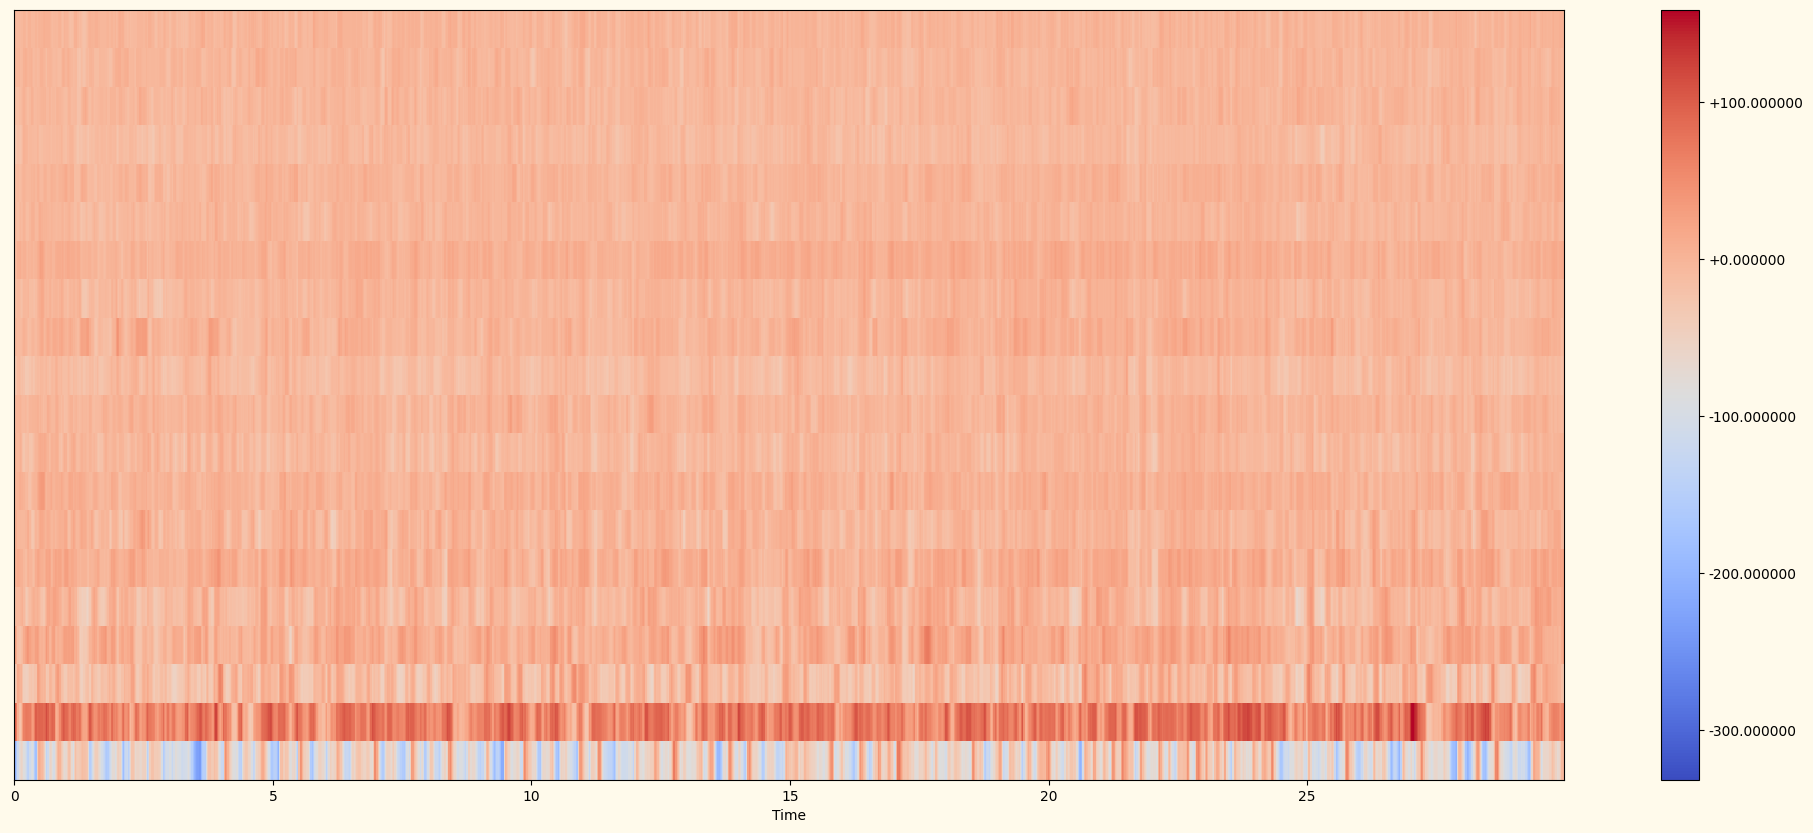

In [150]:
#Visualize MFCCs
plt.figure(figsize=(25,10))
librosa.display.specshow(mfccs, x_axis='time', sr=sr)

plt.colorbar(format='%+2f')
plt.show # y axis shows each coefficient 1-20 , x axis shows the time in s, 


In [151]:
# calculate delta and delta2 MFCCs

delta_mfccs = librosa.feature.delta(mfccs)
delta2_mfccs = librosa.feature.delta(mfccs, order=2)

In [152]:
delta_mfccs.shape # 20 coefficients and 1291 frames for the 30s audio clip 

(20, 1291)

<function matplotlib.pyplot.show(close=None, block=None)>

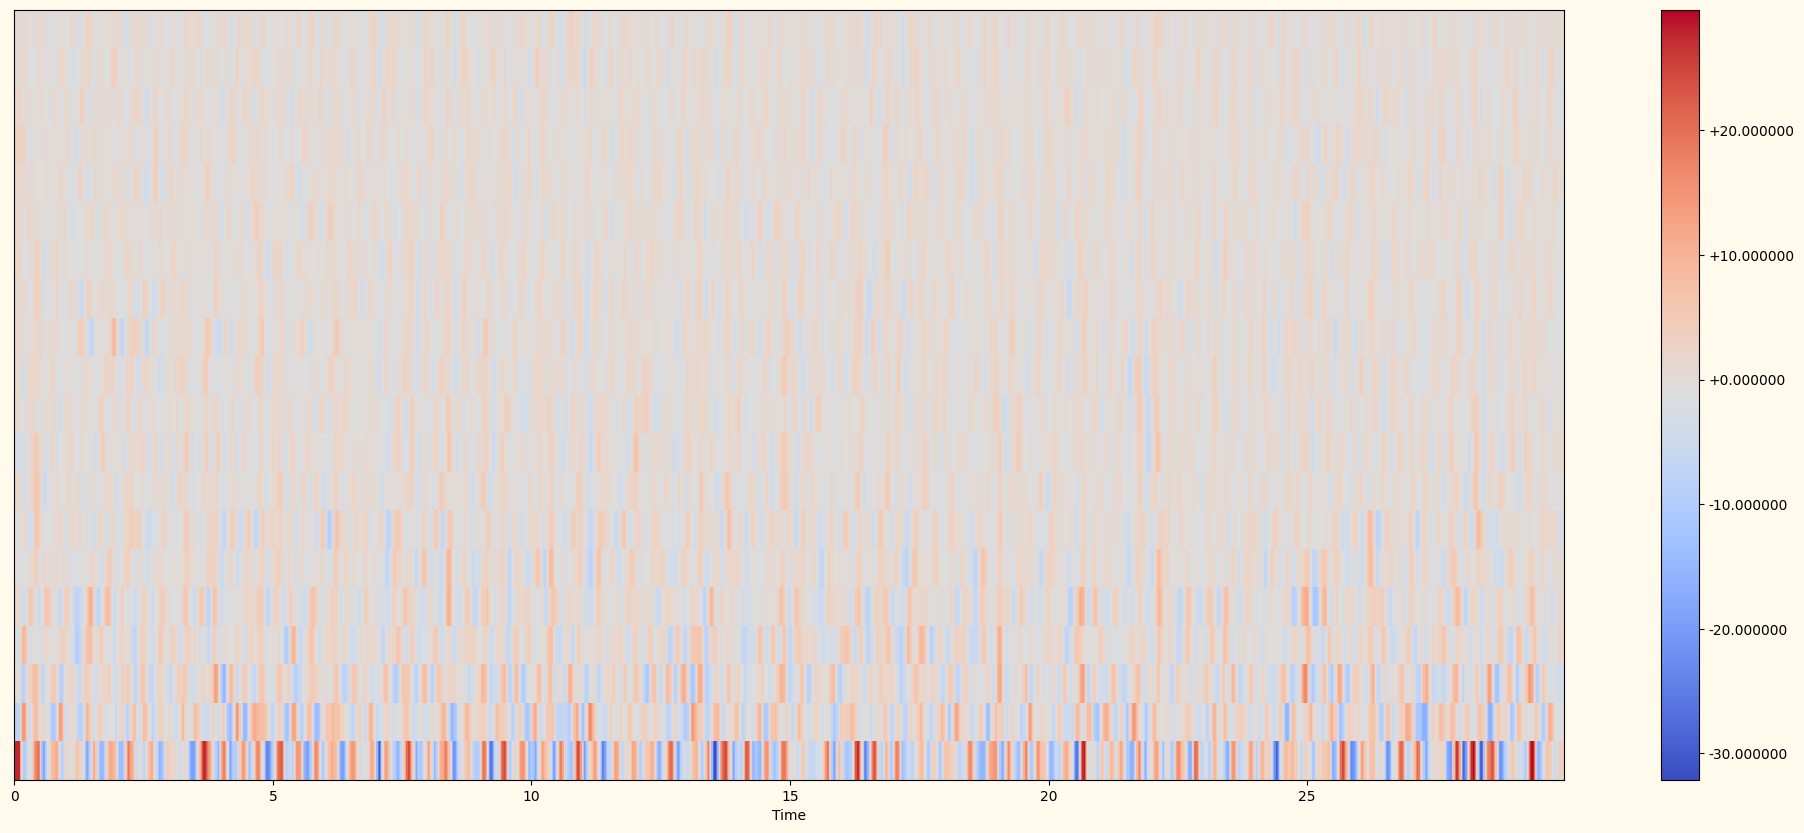

In [153]:
# visualize MFCCs delta
plt.figure(figsize=(25,10))
librosa.display.specshow(delta_mfccs, x_axis='time', sr=sr)

plt.colorbar(format='%+2f')
plt.show # y axis shows each coefficient 1-20 , x axis shows the time in s, 

<function matplotlib.pyplot.show(close=None, block=None)>

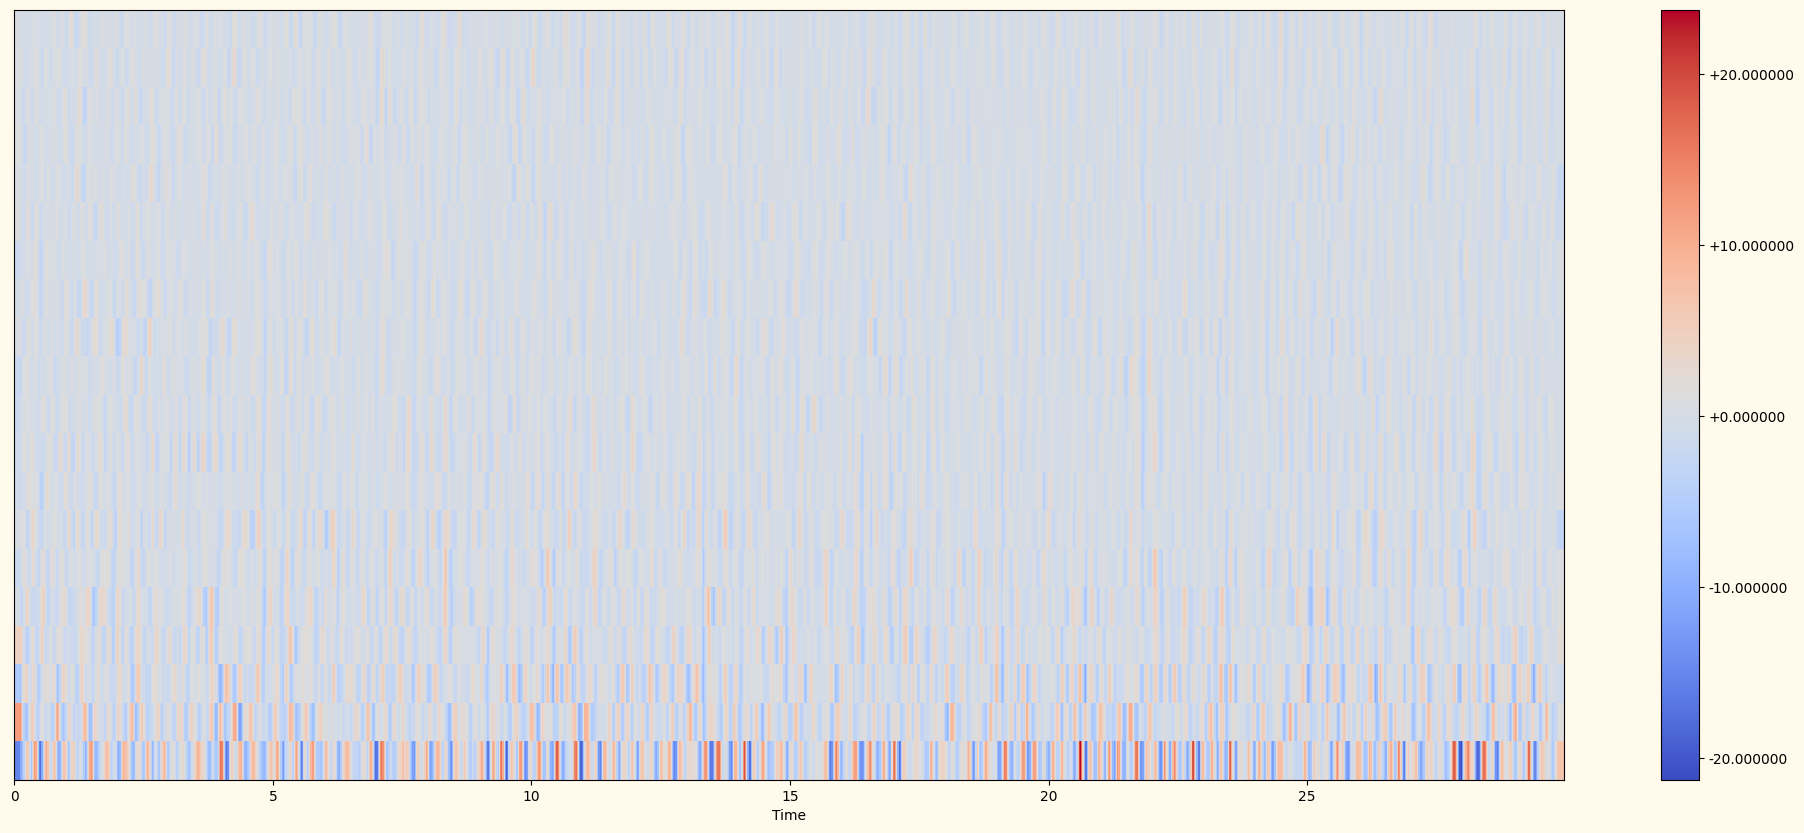

In [154]:
# visualize MFCCs delta 2
plt.figure(figsize=(25,10))
librosa.display.specshow(delta2_mfccs, x_axis='time', sr=sr)

plt.colorbar(format='%+2f')
plt.show # y axis shows each coefficient 1-20 , x axis shows the time in s, 

In [155]:
comprehensive_mfccs = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))